In [1]:
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import Utils.DiaSourceTools as DSTools
from astropy.time import Time

import lsst.afw.display.ds9 as ds9

import re

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Complete"
#DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_daytest/"

In [3]:
directory = DATADIR+"/detect_testSN_6/"
butler = dafPersist.Butler(directory) 
filter = 'i'

In [4]:
patches = []
patches_file=open(DATADIR+"/patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()

In [5]:
dates = []
days_file=open(DATADIR+"/days.txt", "rb")

for day in days_file:
    day = day.replace('\n','')
    dates.append(day)

days_file.close()
print dates
print patches

['2006-01-02', '2006-01-07', '2006-01-08', '2006-01-31', '2006-02-03', '2006-02-05', '2006-02-06', '2006-02-25', '2006-03-04', '2006-03-05', '2006-03-07', '2006-04-22', '2006-04-23', '2006-04-26', '2006-04-28', '2006-04-30', '2006-05-04', '2006-05-20', '2006-05-24', '2006-05-27', '2006-05-28', '2006-06-02', '2006-06-04', '2006-06-06', '2006-06-20', '2006-06-23', '2006-06-24', '2006-06-25', '2006-06-29', '2006-06-30', '2006-07-03', '2006-07-19', '2006-07-20', '2006-07-23', '2006-07-27']
['0,5', '0,6', '0,7', '0,8', '0,9', '0,10', '0,11', '0,12', '0,13', '0,14', '0,15', '0,16', '0,17', '0,18', '0,19', '0,20', '0,21', '0,22', '0,23', '0,24', '0,25', '1,5', '1,6', '1,7', '1,8', '1,9', '1,10', '1,11', '1,12', '1,13', '1,14', '1,15', '1,16', '1,17', '1,18', '1,19', '1,20', '1,21', '1,22', '1,23', '1,24', '1,25', '2,5', '2,6', '2,7', '2,8', '2,9', '2,10', '2,11', '2,12', '2,13', '2,14', '2,15', '2,16', '2,17', '2,18', '2,19', '2,20', '2,21', '2,22', '2,23', '2,24', '2,25', '3,5', '3,6', '3,7'

In [113]:
patches = ['22,18']
dates=['2006-06-25']

In [6]:
dates_dict = {}
for date in dates:
    dates_dict[date] = []

In [7]:
catalogs = []

for date in dates:
    date_catalog = None
    for patch in patches:
        if butler.datasetExists("dayDiff_class_diaSrc", dataId={"filter":filter,"tract":0, "patch":patch, 'date':date}):
            dates_dict[date].append(patch)
            if date_catalog is None:
                date_catalog = butler.get("dayDiff_class_diaSrc", dataId={"filter":filter,"tract":0, "patch":patch, 'date':date})
            else:
                date_catalog.extend(butler.get("dayDiff_class_diaSrc", dataId={"filter":filter,"tract":0, "patch":patch, 'date':date}))
    if date_catalog is not None:
        catalogs.append((date, date_catalog))

In [8]:
print dates_dict["2006-06-25"]

[]


In [9]:
for date,catalog in catalogs:
    print len(catalog)

18522
61763
69568
20493
26330
87762
42086
71201
32548
50581
79397
49024
32866
22741
51345
16640
77355
25358
40921
29475
31927
21214
15885
56627


In [10]:
len(dates)

35

In [11]:
lens = 0

for date, catalog in catalogs:
    lens+=len(catalog)

print lens

1031629


In [12]:

multi_matches = afwTable.MultiMatch(catalogs[0][-1].schema, {'mjd':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
for date, catalog in catalogs:
    t = Time(date)
    
    multi_matches.add(catalog, {'mjd':int(t.mjd)})
    print t.mjd
results = multi_matches.finish(removeAmbiguous=False)

53737.0
53742.0
53766.0
53769.0
53772.0
53791.0
53798.0
53801.0
53847.0
53851.0
53855.0
53859.0
53875.0
53879.0
53883.0
53888.0
53892.0
53906.0
53910.0
53915.0
53919.0
53935.0
53939.0
53943.0


In [ ]:
multi_matches = afwTable.MultiMatch(catalogs[0][-1].schema, {'mjd':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))

for date in dates:
    t = Time(date)
    date_catalog = None
    for patch in patches:
        if butler.datasetExists("dayDiff_class_diaSrc", dataId={"filter":filter,"tract":0, "patch":patch, 'date':date}):
            date_catalog = butler.get("dayDiff_class_diaSrc", dataId={"filter":filter,"tract":0, "patch":patch, 'date':date})
            multi_matches.add(date_catalog, {'mjd':int(t.mjd)})
        
    
results = multi_matches.finish(removeAmbiguous=False)    

In [ ]:
lcs = DSTools.get_light_curves_from_multimatch_results2(results)

In [ ]:
len(lcs)

In [ ]:
t_lcs = DSTools.threshold_light_curves(lcs, 3)

In [ ]:
len(t_lcs)

In [ ]:

stack_lc_3 = []
stack_lc_45 = []
stack_lc_6 = []
stack_lc_9 = []

for t_lc in t_lcs:
    stack_lc_3.append(DSTools.build_lightcurve3(t_lc, "base_CircularApertureFlux_3_0_flux"))
    stack_lc_45.append(DSTools.build_lightcurve3(t_lc, "base_CircularApertureFlux_4_5_flux"))
    stack_lc_6.append(DSTools.build_lightcurve3(t_lc, "base_CircularApertureFlux_6_0_flux"))
    stack_lc_9.append(DSTools.build_lightcurve3(t_lc, "base_CircularApertureFlux_9_0_flux"))

In [ ]:
%matplotlib inline
import re
import astropy.coordinates as coord
import astropy.units as u

filter='r'

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

snls_array = []
for sn in elems:
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    snls_lc = DSTools.build_light_curve_from_snls_file(m, c)
   
    print sn[0], c.ra.deg, c.dec.deg
    
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    snls_array.append(snls_lc)
    plt.show()

In [ ]:

matches = DSTools.match_control_group(stack_lc,snls_array)
float(len(matches))/float(len(snls_array))

In [ ]:
len(matches)

In [ ]:
for lc in snls_array:
    print "light curve"
    val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
    print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
    for slc in stack_lc:

        comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
        if DSTools.source_distance(val, comp)<1:
            print "here", len(slc)

        #print np.rad2deg(float(np.mean(slc["ra"]))), np.rad2deg(float(np.mean(slc["dec"])))

        

In [ ]:
print val, comp

In [ ]:
matches = []
for lc in snls_array:
    #print "light curve"
    val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
    #print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
    for i, slc in enumerate(stack_lc):

        comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
        if DSTools.source_distance(val, comp)<1:
            #print i
            matches.append((lc,slc))
            
            
print len(matches)

In [367]:
def match_with_lc(snls_array, stack_lc):
    matches = []
    for lc in snls_array:
        #print "light curve"
        val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
        #print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
        for i, slc in enumerate(stack_lc):

            comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
            if DSTools.source_distance(val, comp)<1:
                print i
                matches.append((lc,slc))


    print len(matches)
    return matches

In [368]:
matches_3= match_with_lc(snls_array, stack_lc_3)

26404
22319
18465
38854
1788
38174
39319
8774
44537
44061
47780
47588
47343
1566
4663
52631
34213
54248
53944
19


In [ ]:
matches_45= match_with_lc(snls_array, stack_lc_45)
matches_6= match_with_lc(snls_array, stack_lc_6)
matches_9= match_with_lc(snls_array, stack_lc_9)


In [ ]:
def show_matches(matches):
    factors = []
    for match in matches:
        print len(match[-1])
        print np.rad2deg(match[0][0]['ra']), np.rad2deg(match[0][0]['dec'])
        lc_fluxes = match[-1]["flux"]
        factor = max(match[0]['flux']) / max(lc_fluxes)
        lc_fluxes = np.multiply(lc_fluxes, factor)
        lc_errors = np.multiply(match[-1]["flux_error"], factor)
        factors.append(factor)
        plt.figure(figsize=(20,10))
        plt.errorbar(match[0]["mjd"], match[0]["flux"],yerr=match[0]["flux_error"], fmt='.', markersize='5')
        plt.errorbar(match[-1]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
        plt.show()

In [ ]:
def show_matches_2(matches):
    factors = []
    for match in matches:
        print len(match[-1])
        print np.rad2deg(match[0][0]['ra']), np.rad2deg(match[0][0]['dec'])
        lc_fluxes = match[0]["flux"]
        factor = max(match[-1]['flux']) / max(lc_fluxes)
        lc_fluxes = np.multiply(lc_fluxes, factor)
        lc_errors = np.multiply(match[0]["flux_error"], factor)
        
        factors.append(factor)
        plt.figure(figsize=(20,10))
        plt.errorbar(match[-1]["mjd"], match[-1]["flux"],yerr=match[-1]["flux_error"], fmt='.', markersize='5')
        plt.errorbar(match[0]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
        plt.show()

5
214.291841667 53.024825


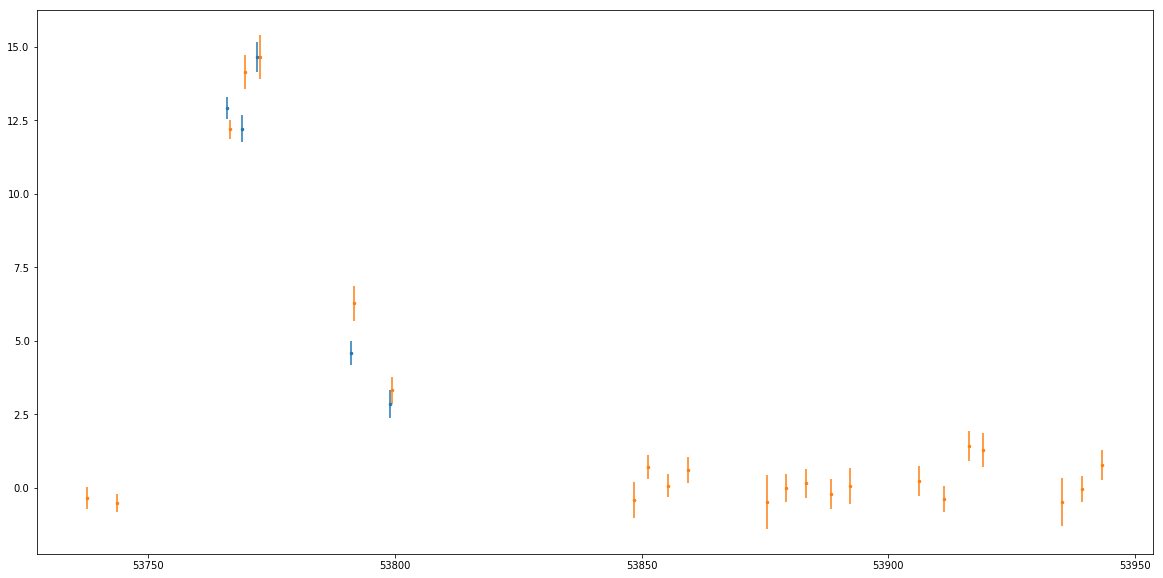

6
215.181558333 52.1910638889


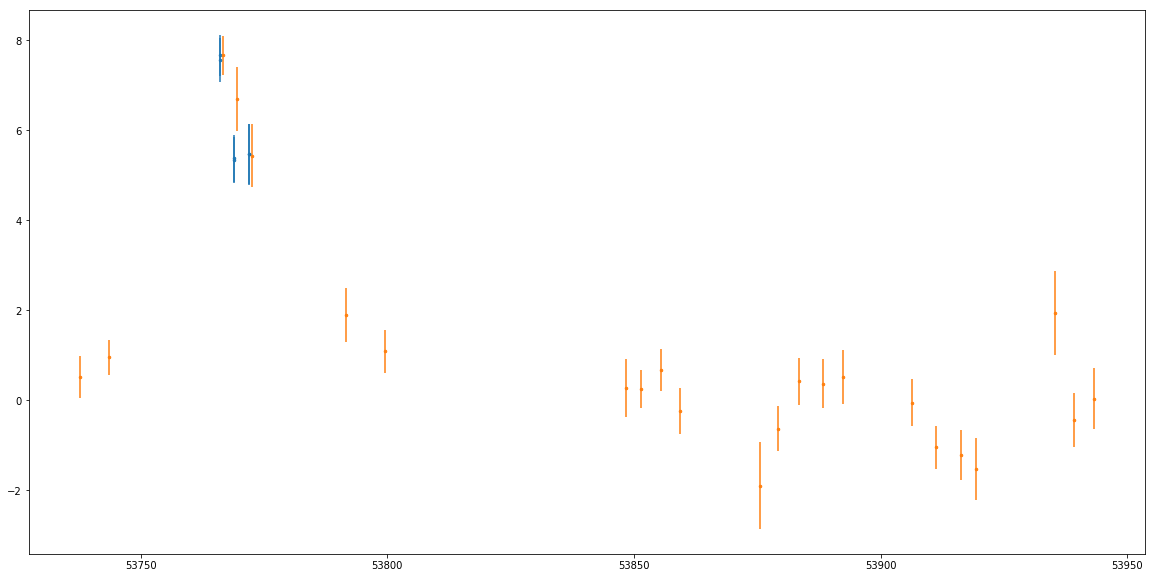

4
214.381666667 52.9124722222


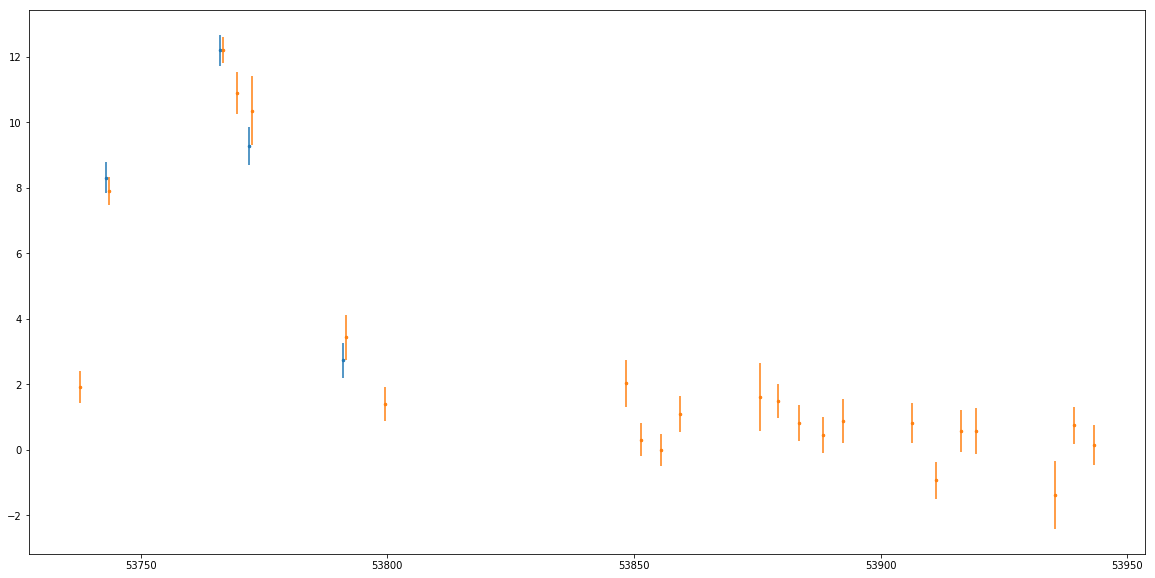

9
214.8577 52.6409833333


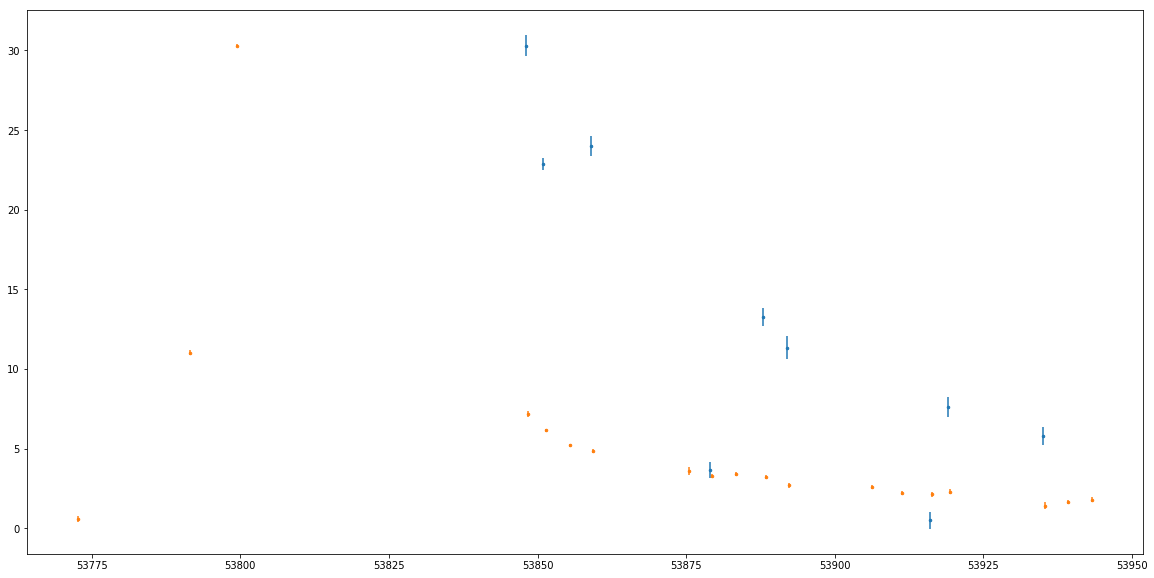

27
215.571704167 52.9576805556


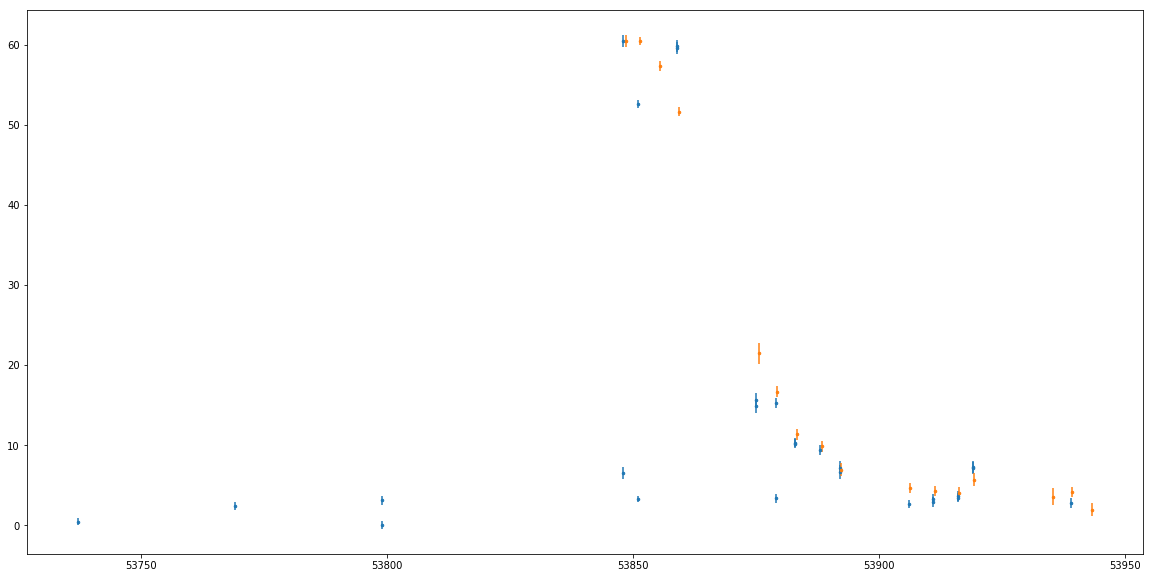

14
215.552404167 52.6408472222


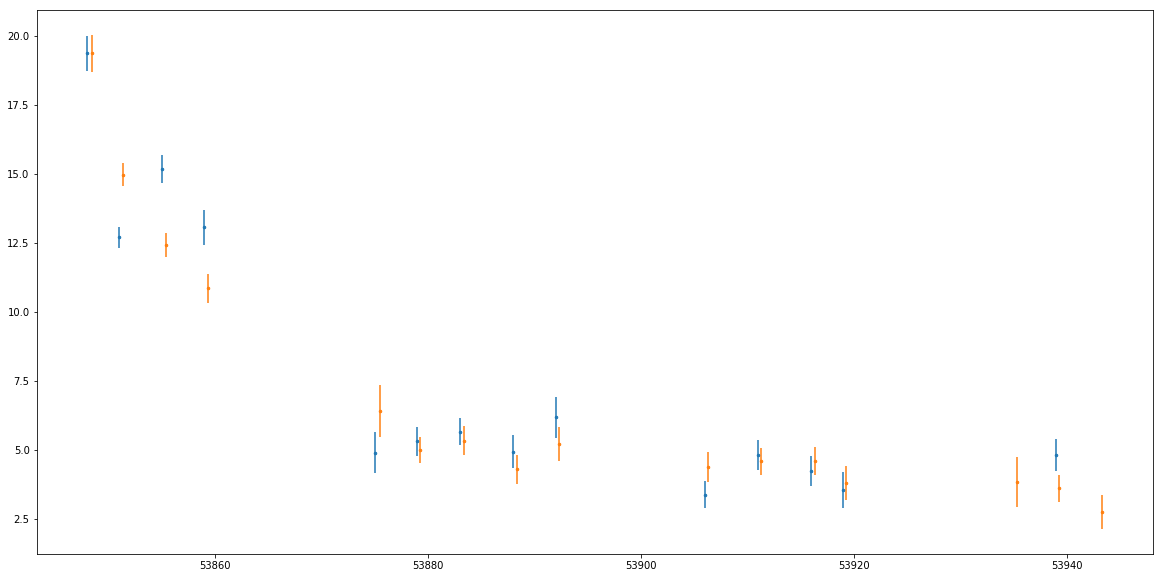

8
214.247466667 52.8825444444


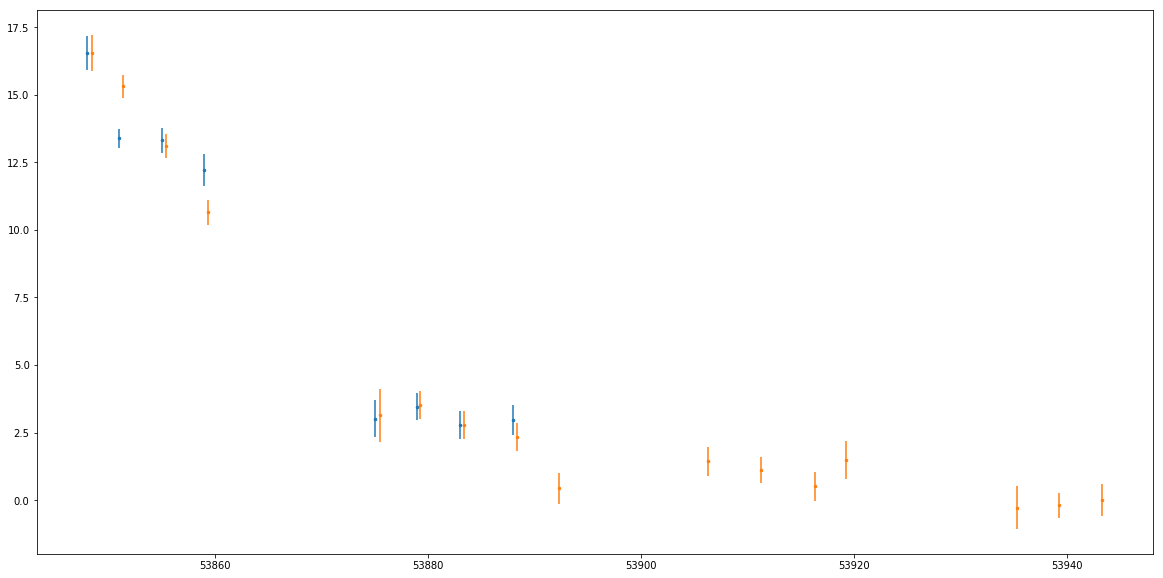

14
214.340266667 52.4528166667


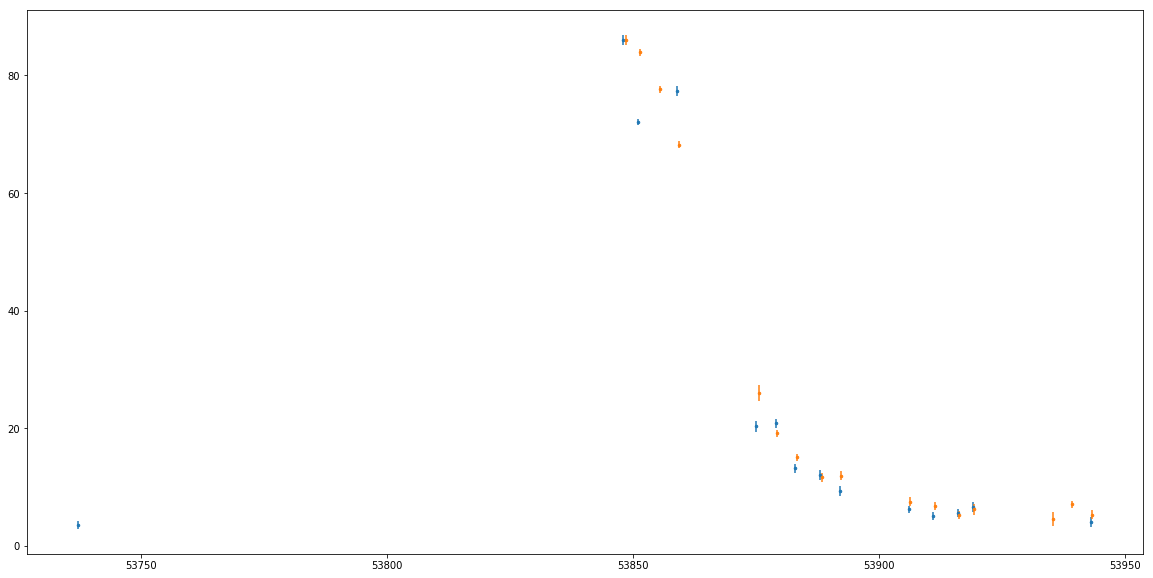

12
214.340266667 52.4528166667


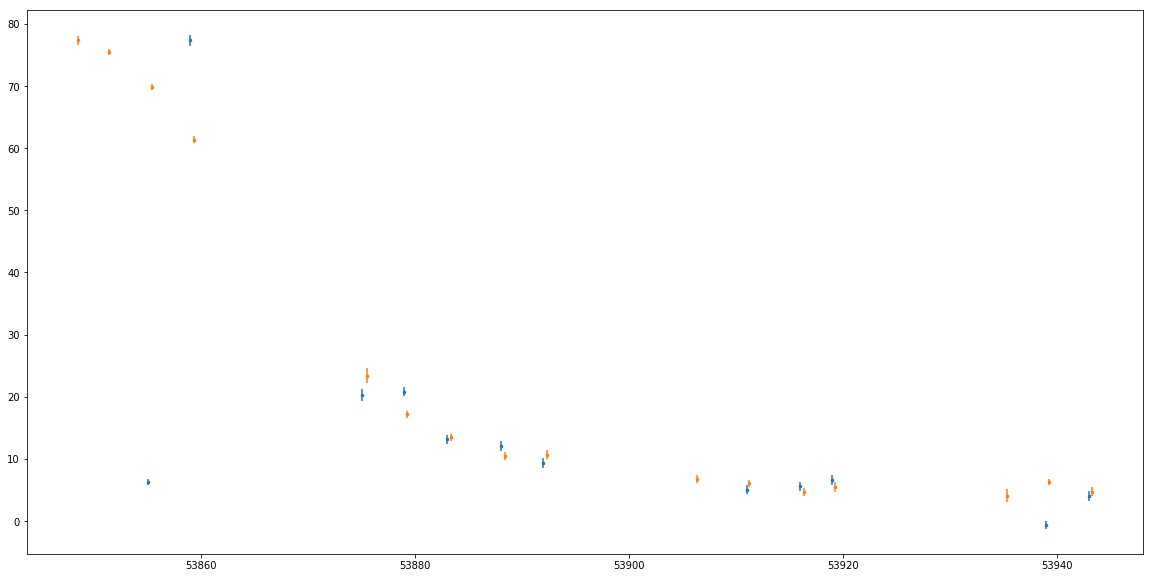

22
214.699175 52.7565583333


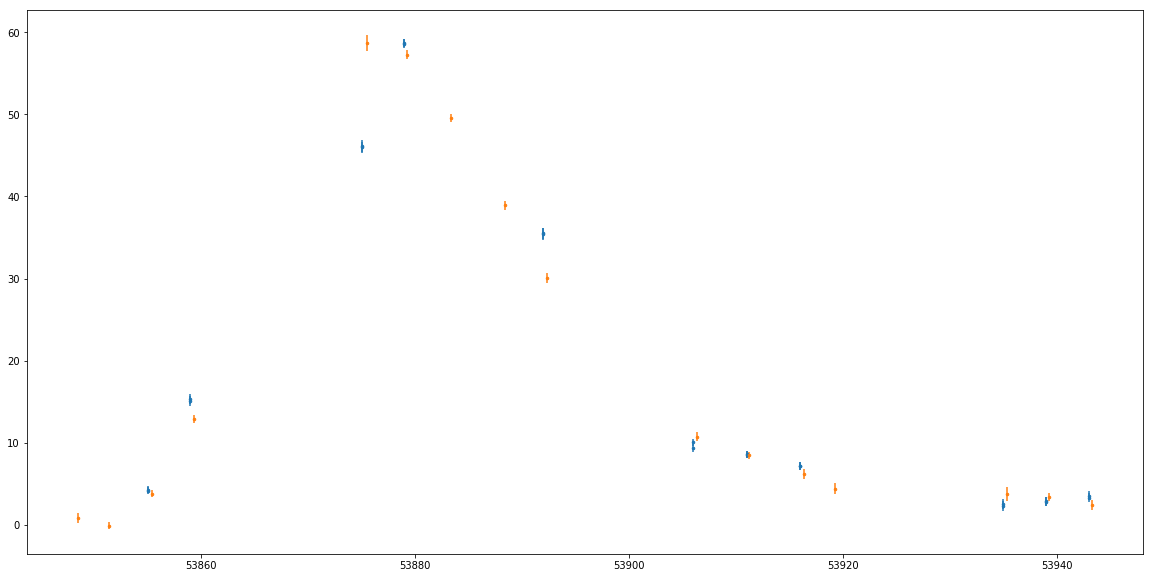

11
214.254529167 52.2324


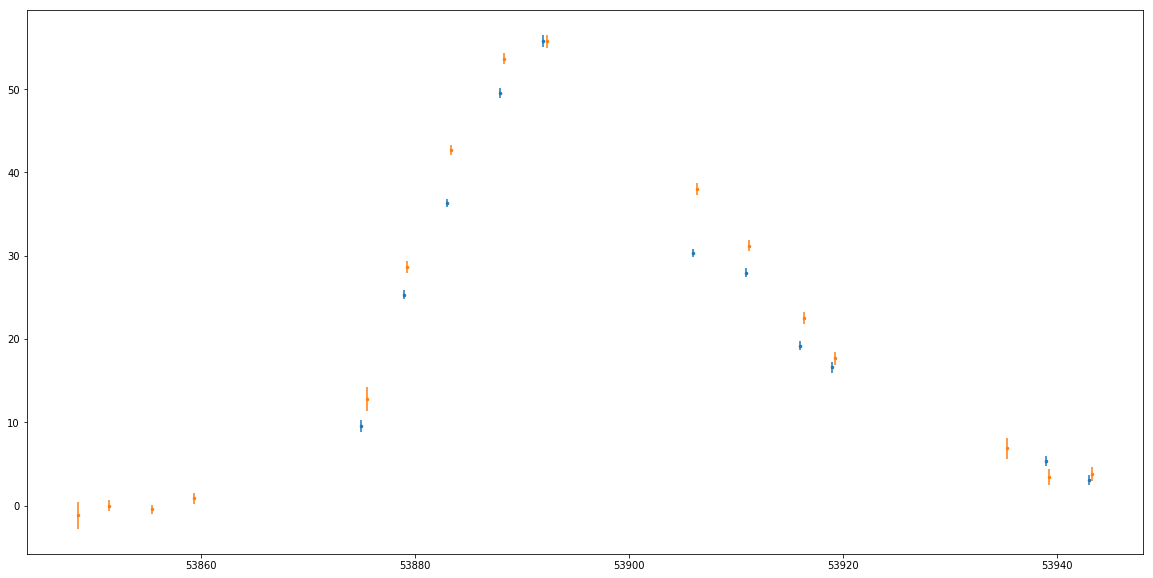

6
214.847579167 53.0230138889


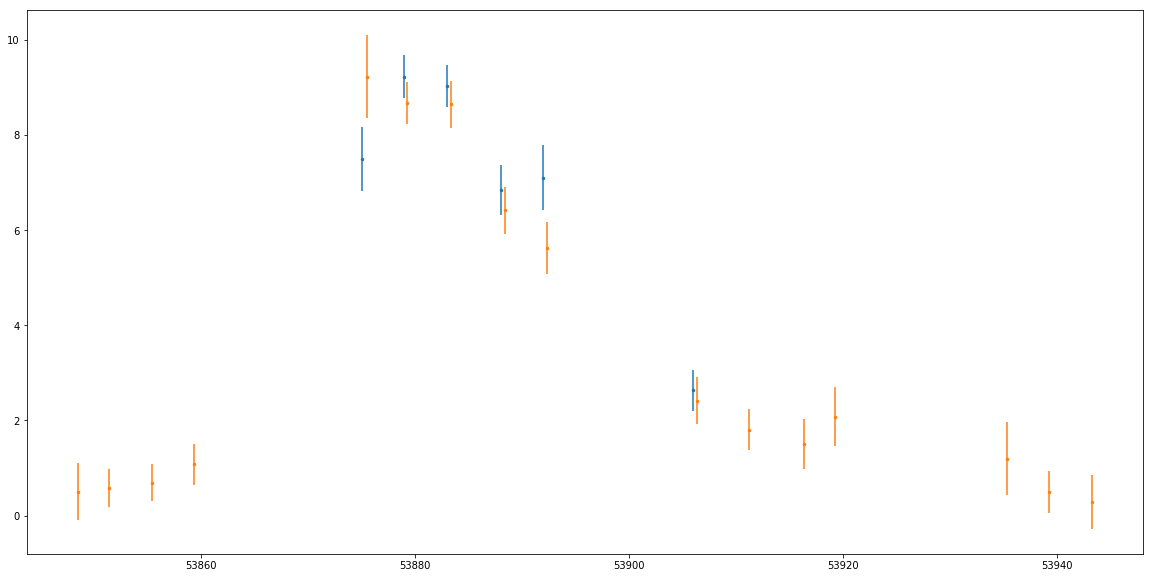

4
215.305566667 52.4560777778


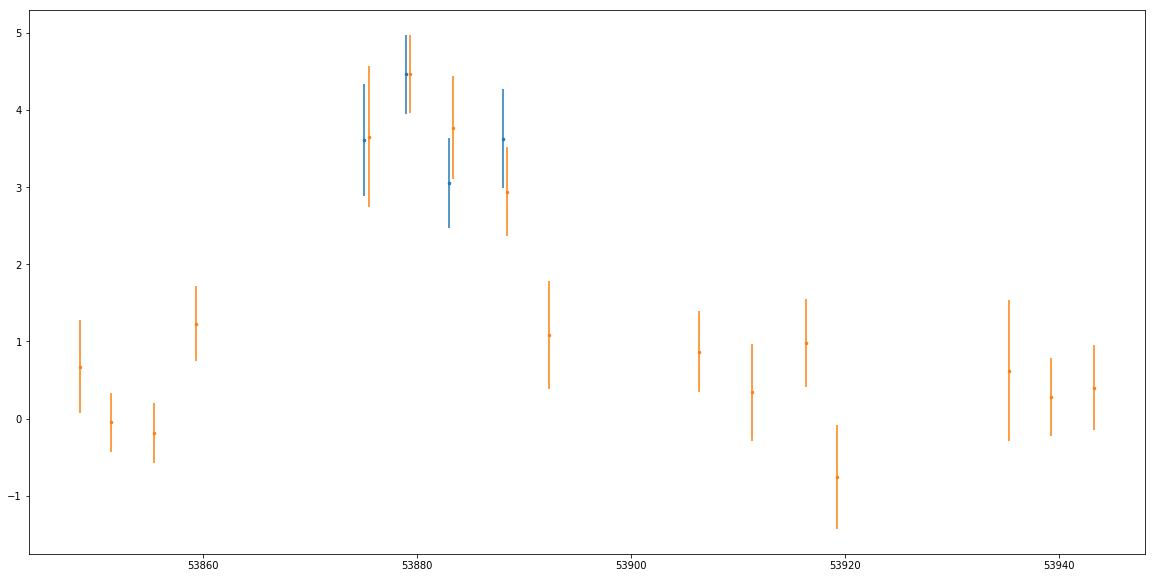

23
215.519875 52.3383666667


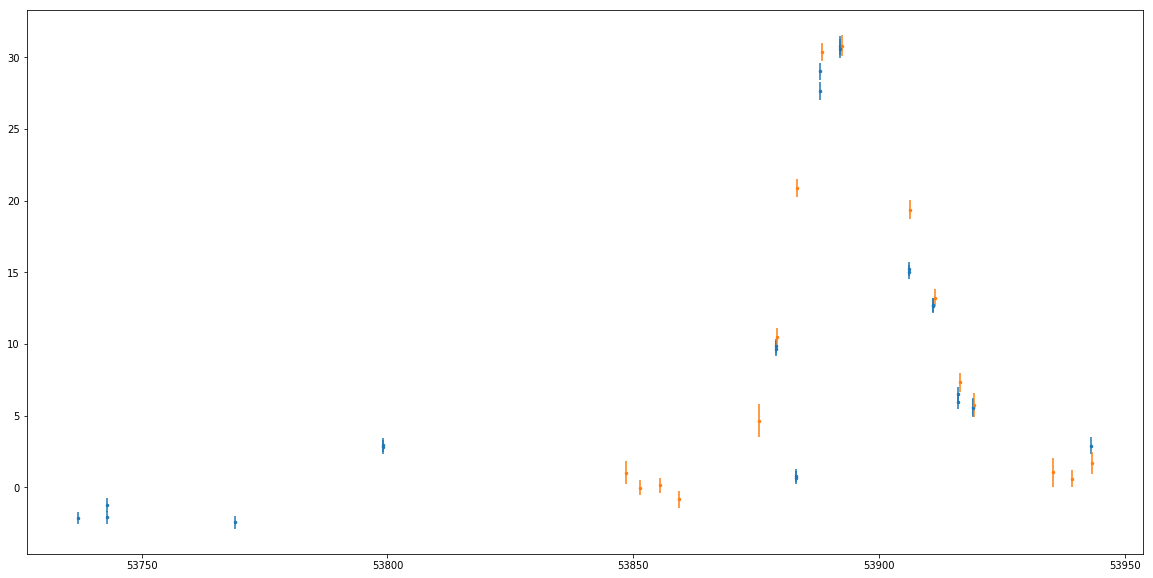

9
215.077520833 52.8971638889


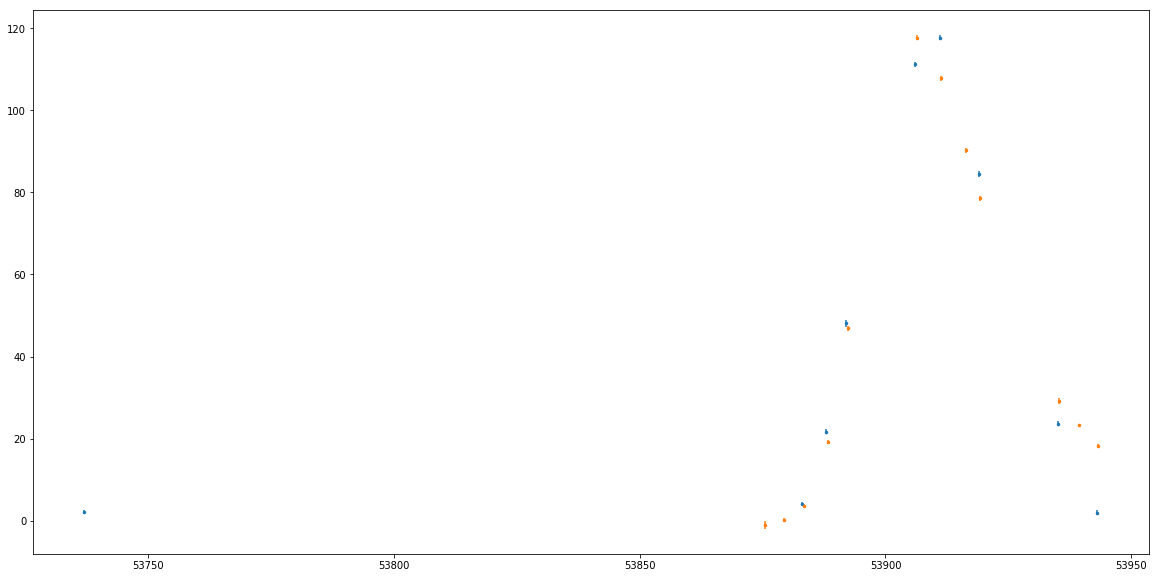

14
214.6309125 52.4429083333


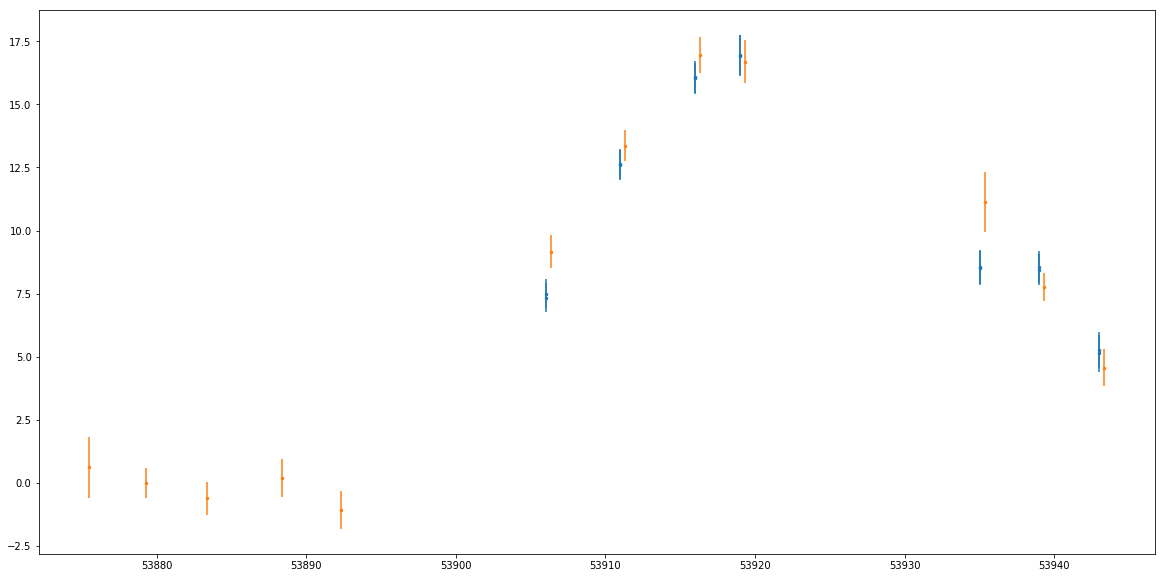

10
214.435958333 52.3611805556


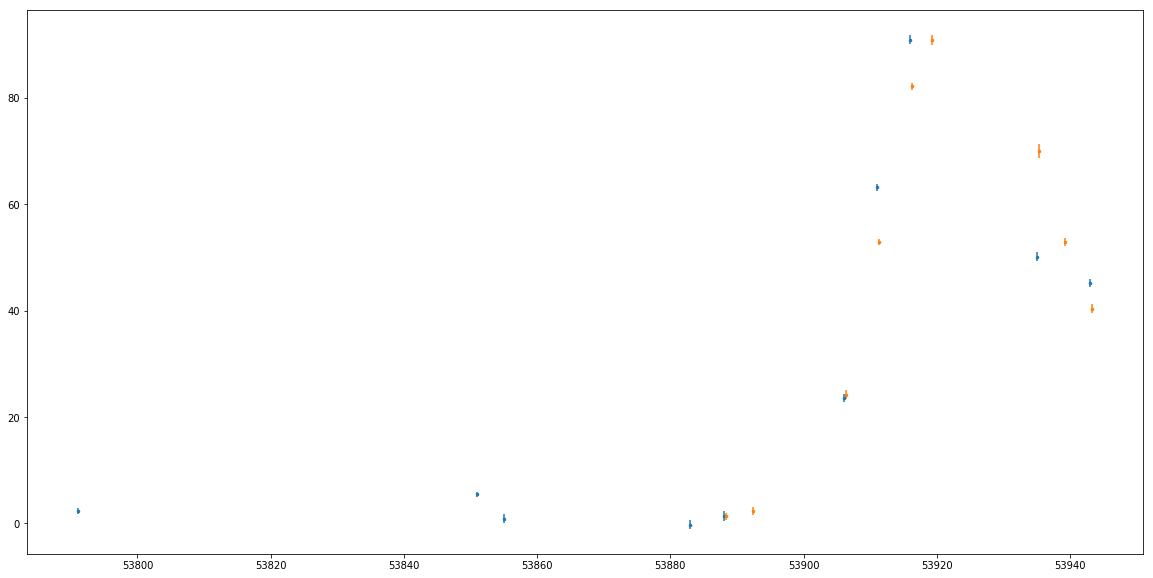

3
214.435958333 52.3611805556


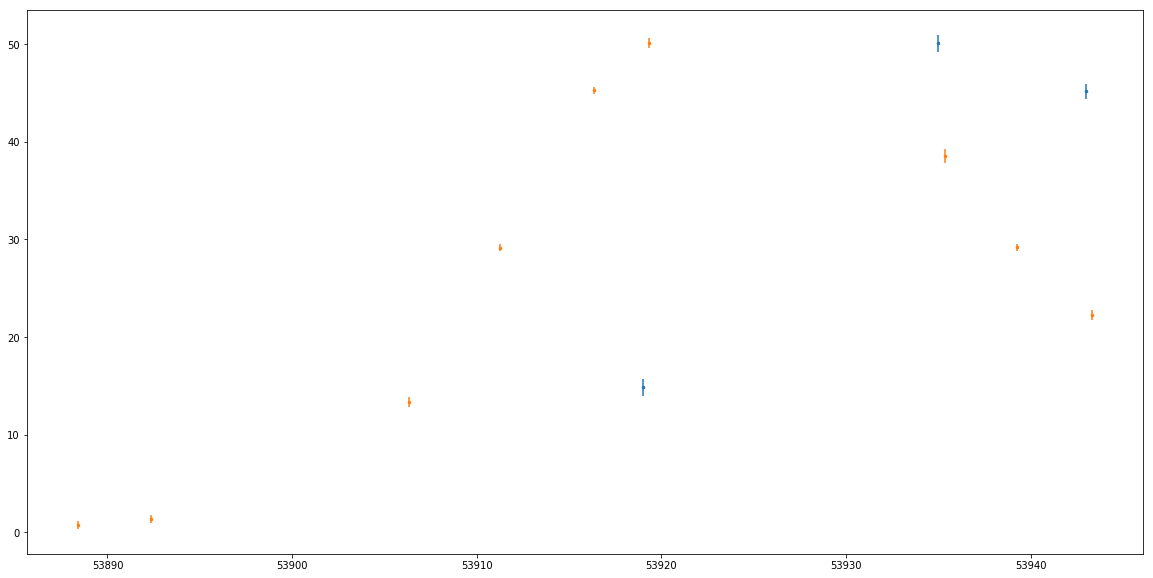

5
214.263475 52.9362527778


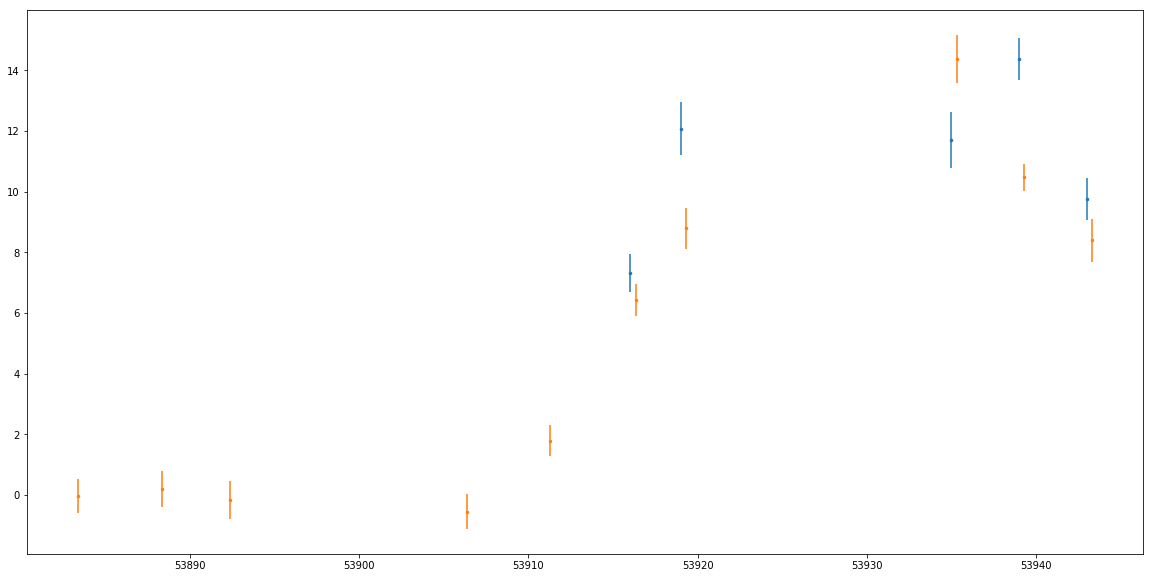

In [363]:
show_matches_2(matches_3)

5
214.291841667 53.024825


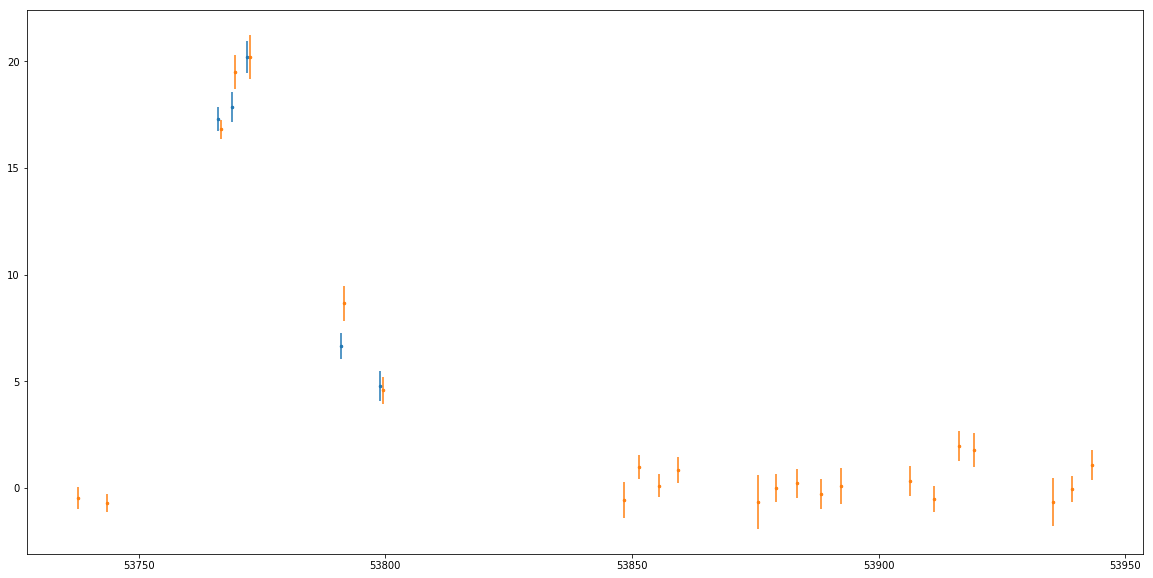

6
215.181558333 52.1910638889


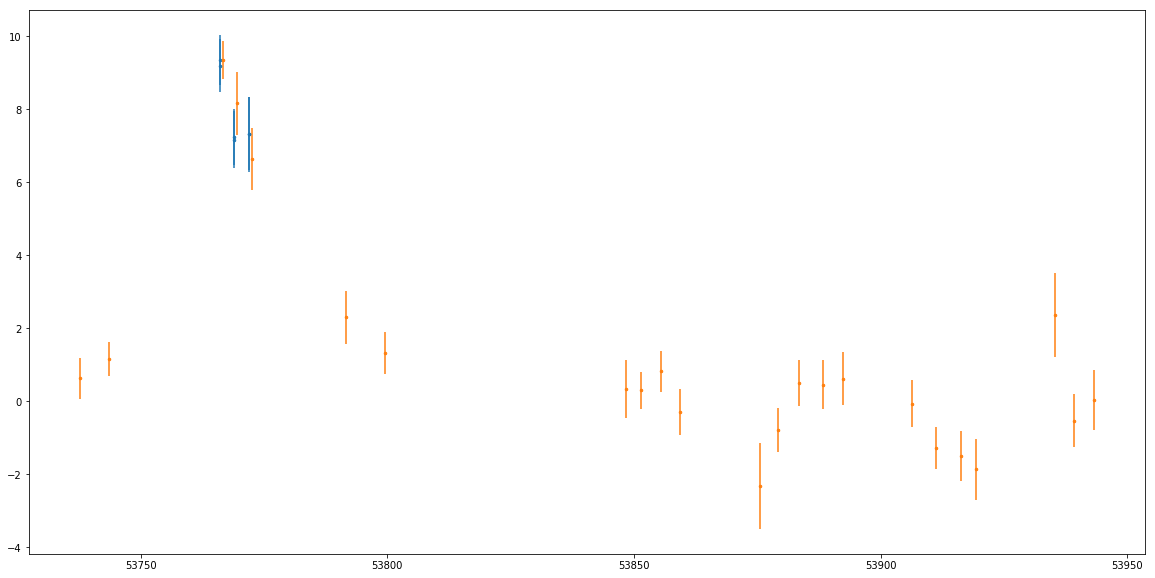

4
214.381666667 52.9124722222


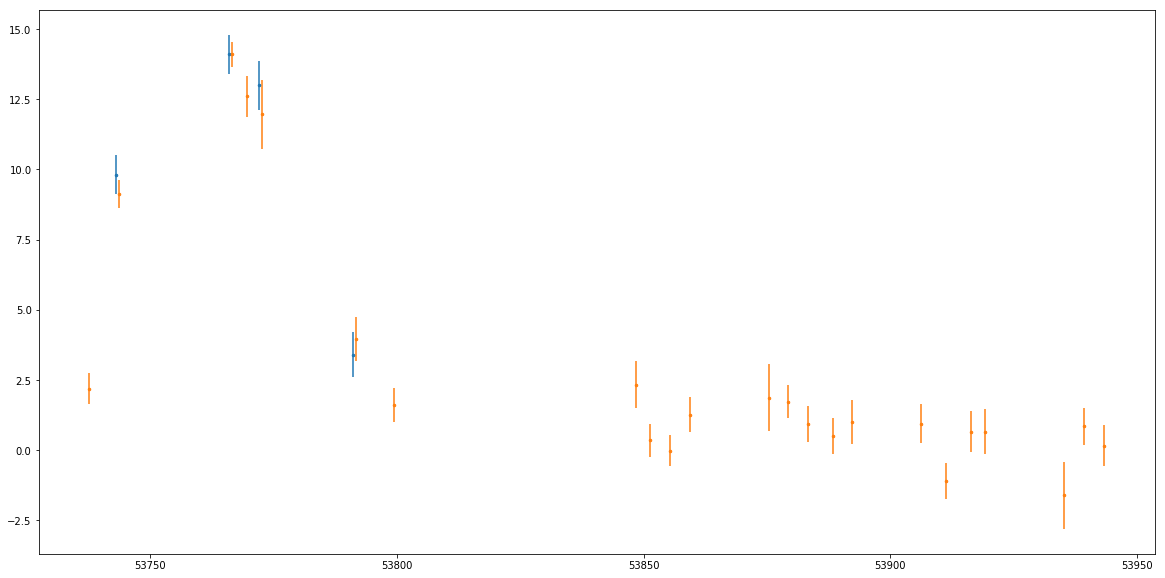

9
214.8577 52.6409833333


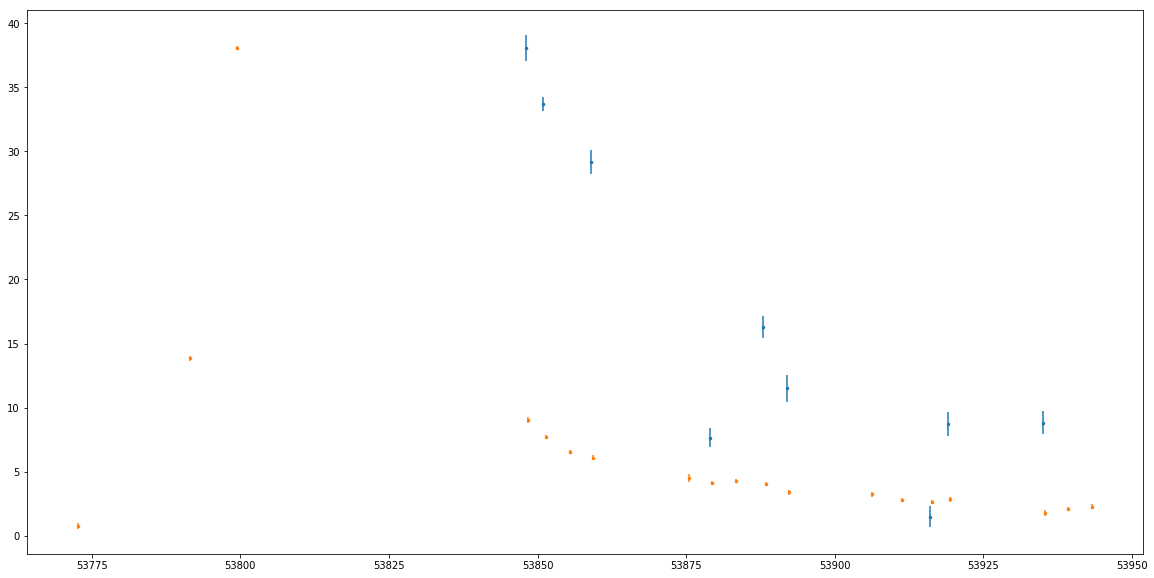

27
215.571704167 52.9576805556


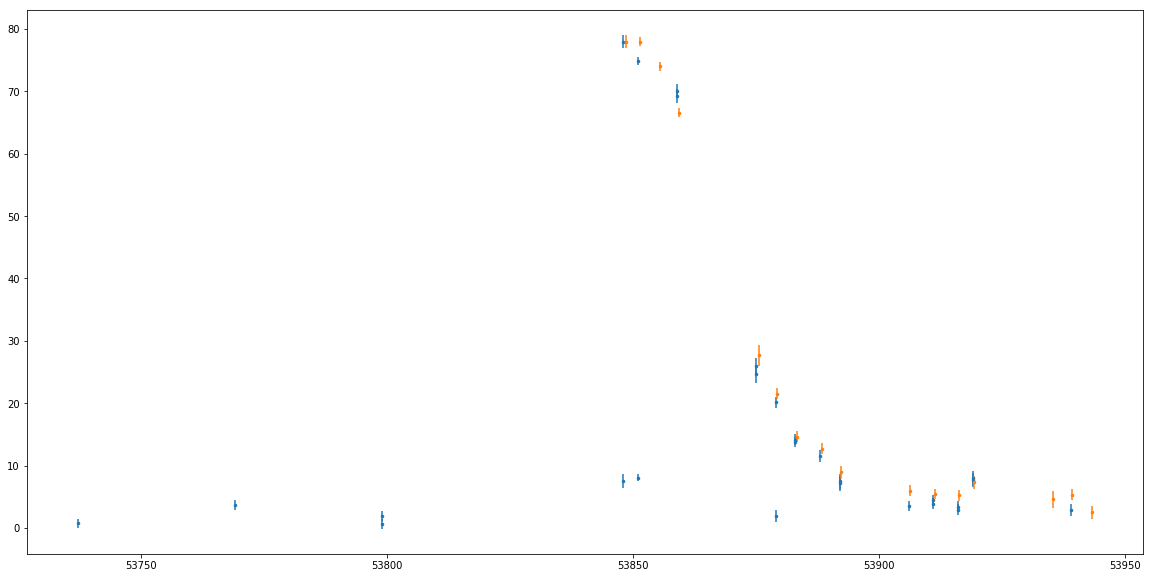

14
215.552404167 52.6408472222


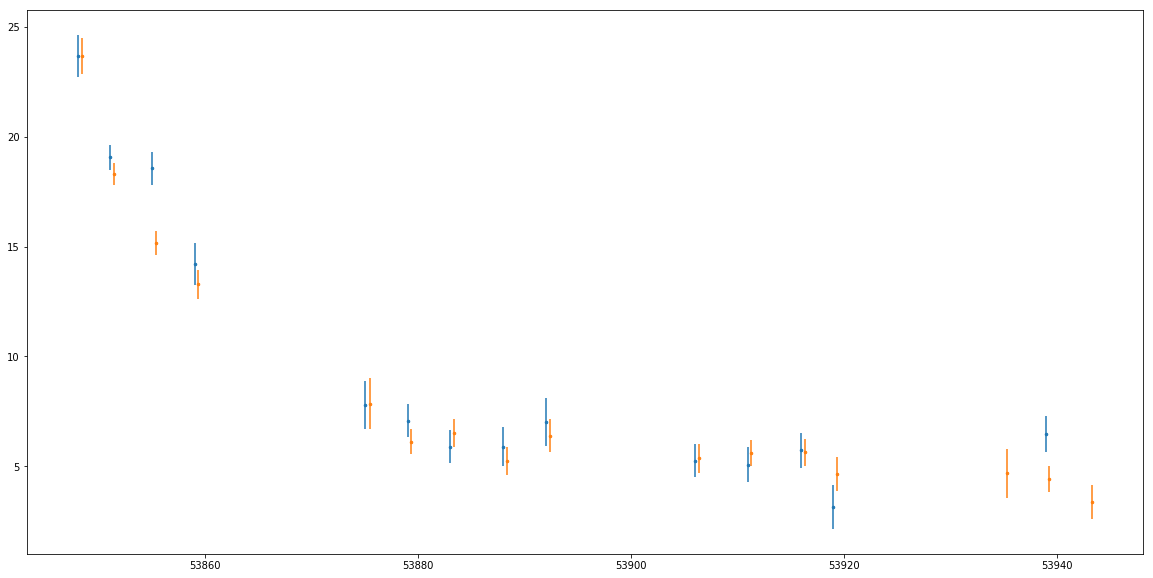

8
214.247466667 52.8825444444


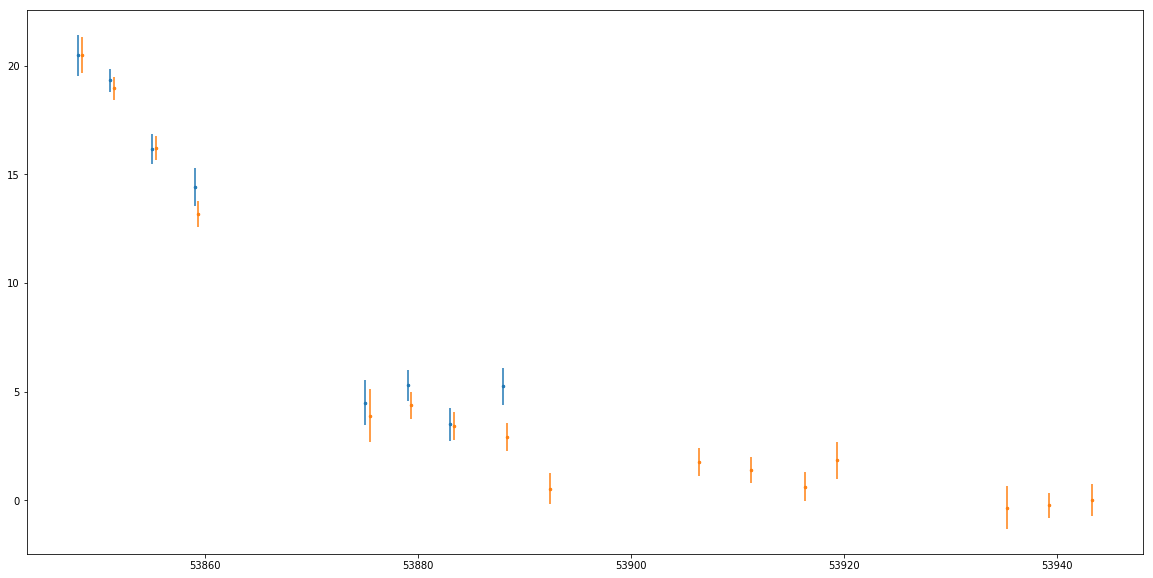

14
214.340266667 52.4528166667


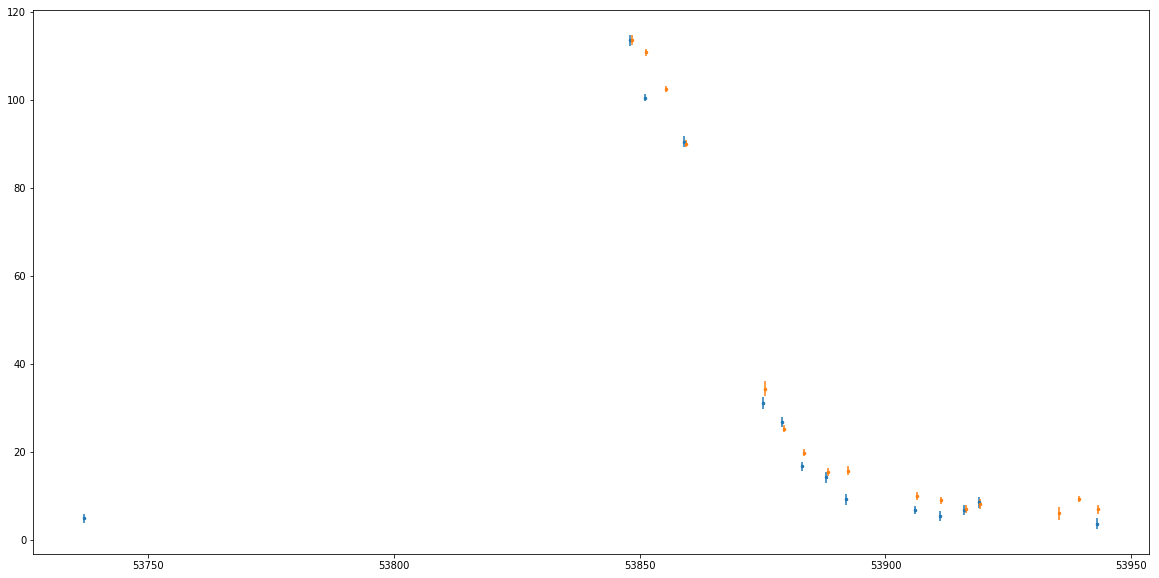

12
214.340266667 52.4528166667


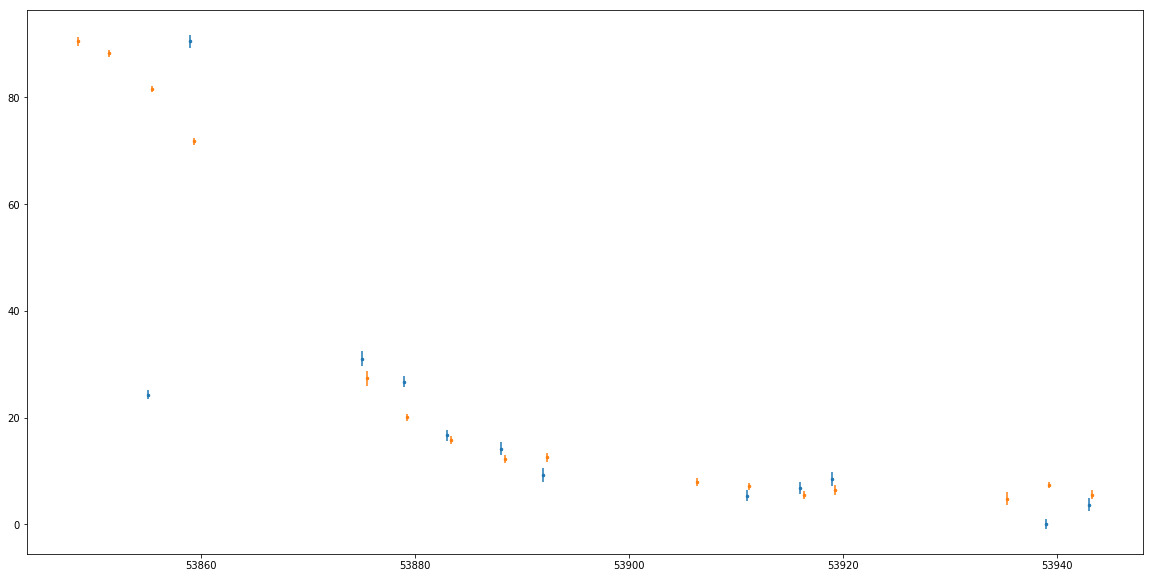

22
214.699175 52.7565583333


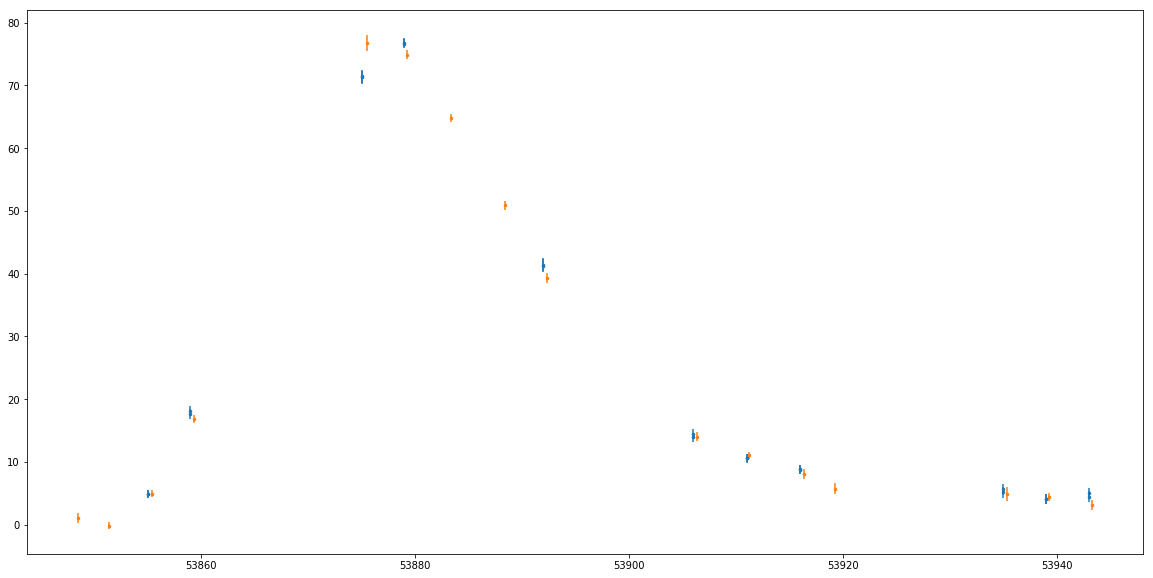

11
214.254529167 52.2324


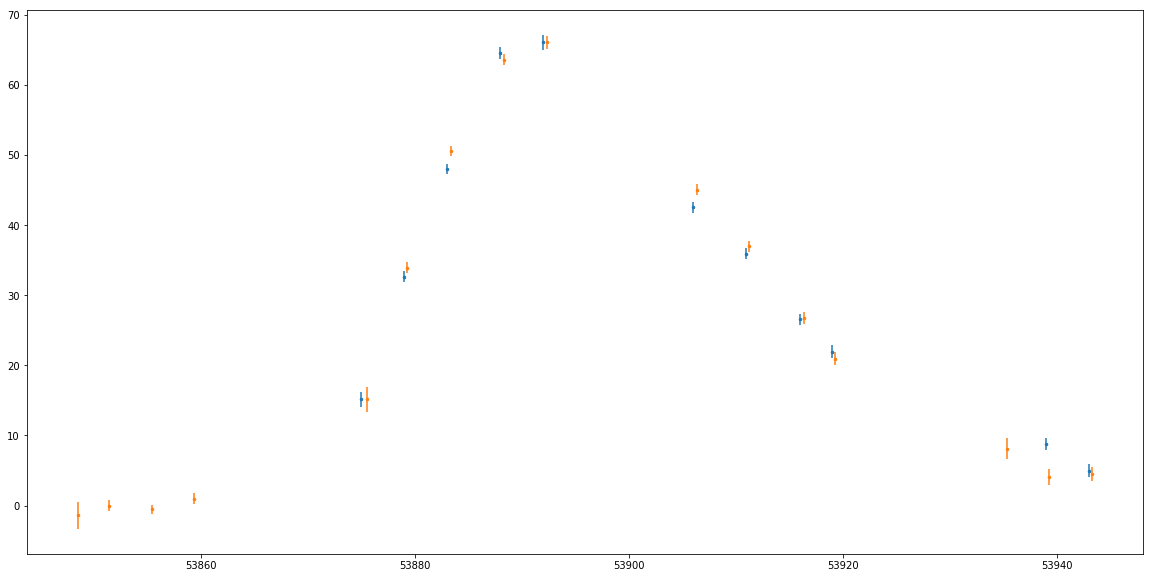

6
214.847579167 53.0230138889


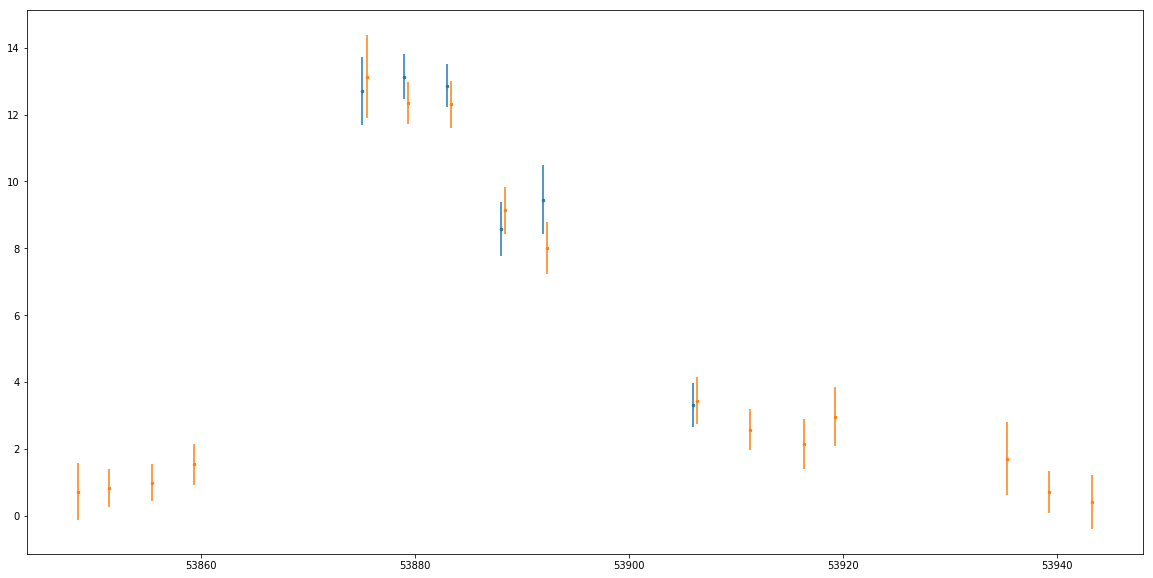

4
215.305566667 52.4560777778


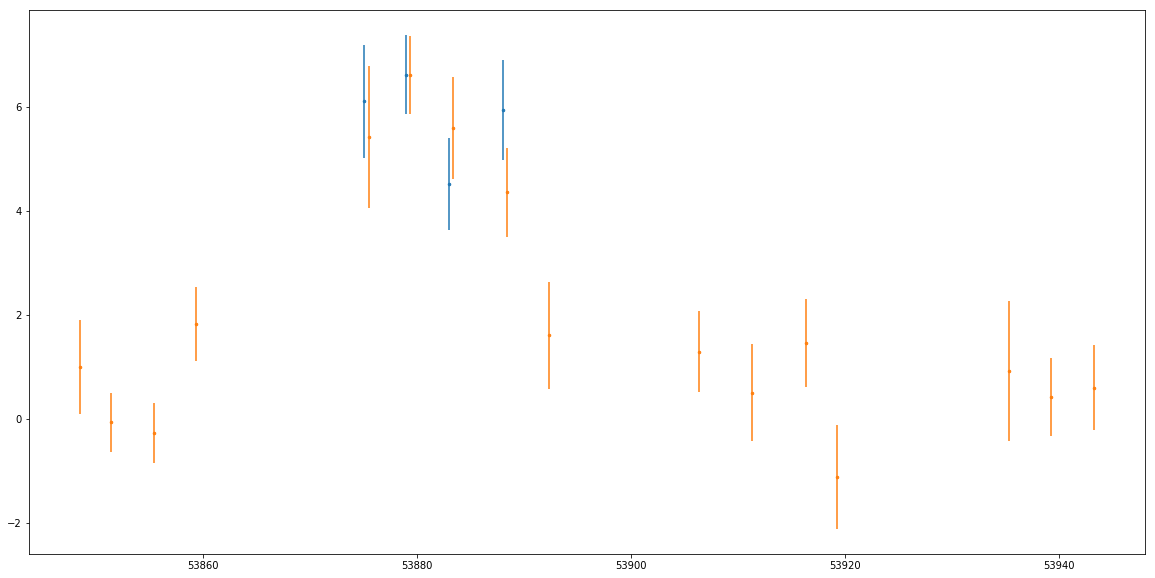

23
215.519875 52.3383666667


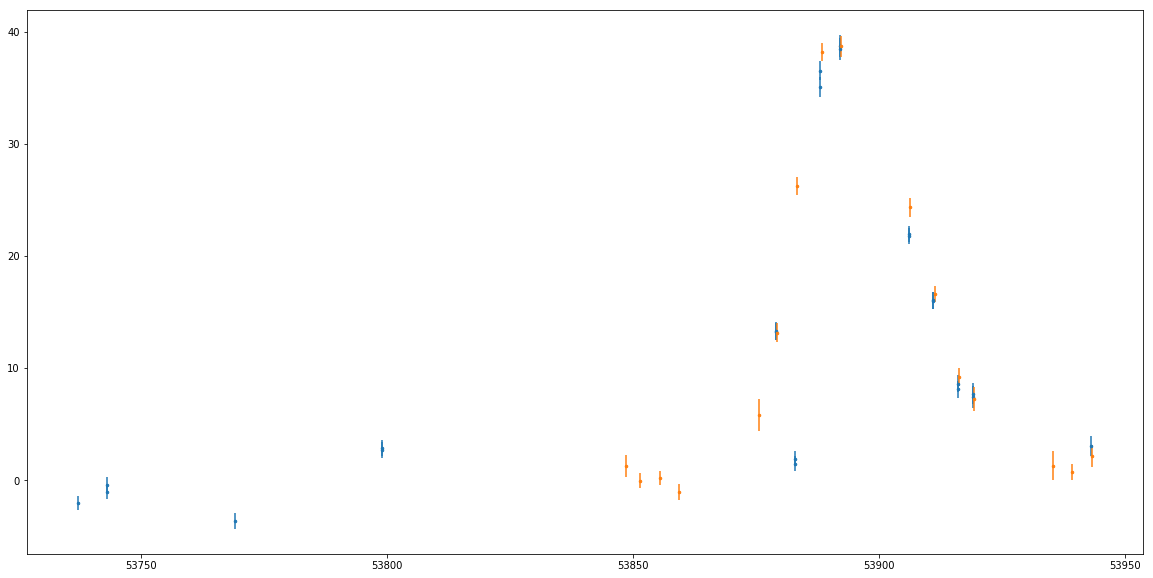

9
215.077520833 52.8971638889


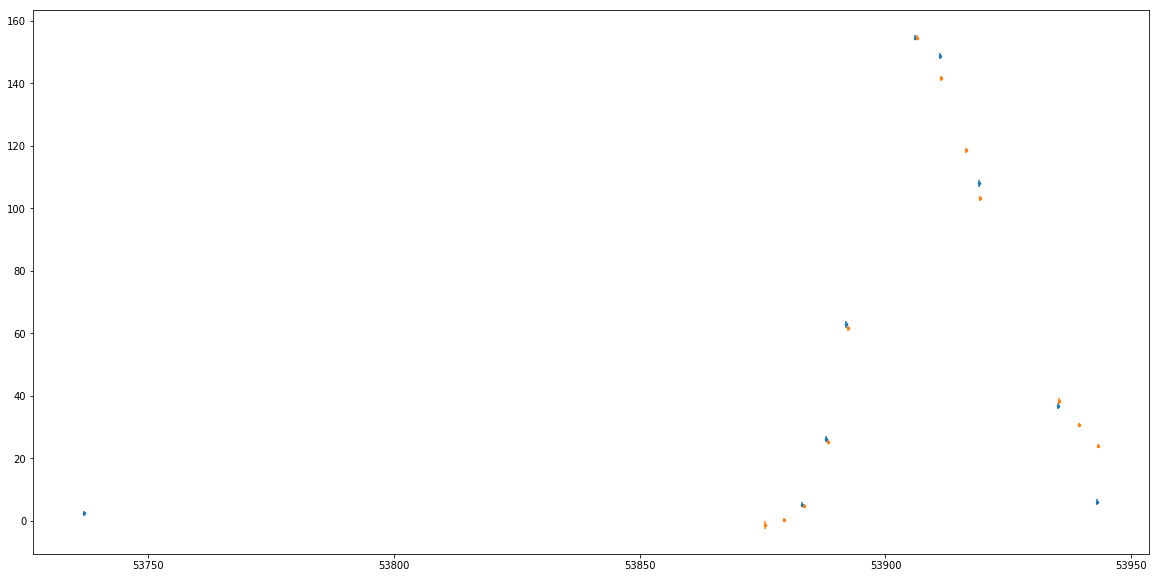

14
214.6309125 52.4429083333


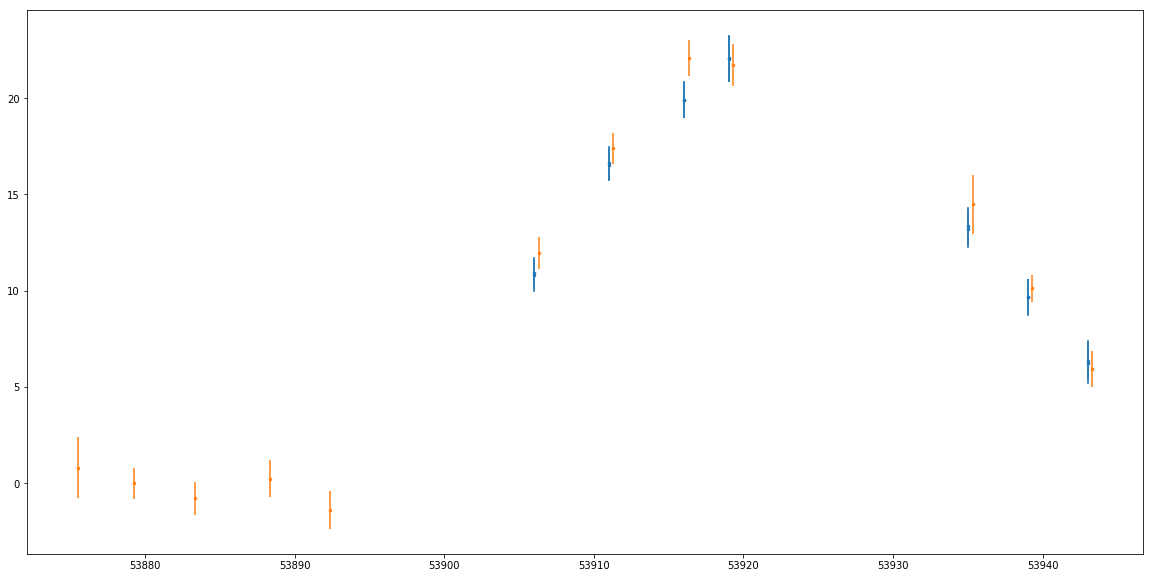

10
214.435958333 52.3611805556


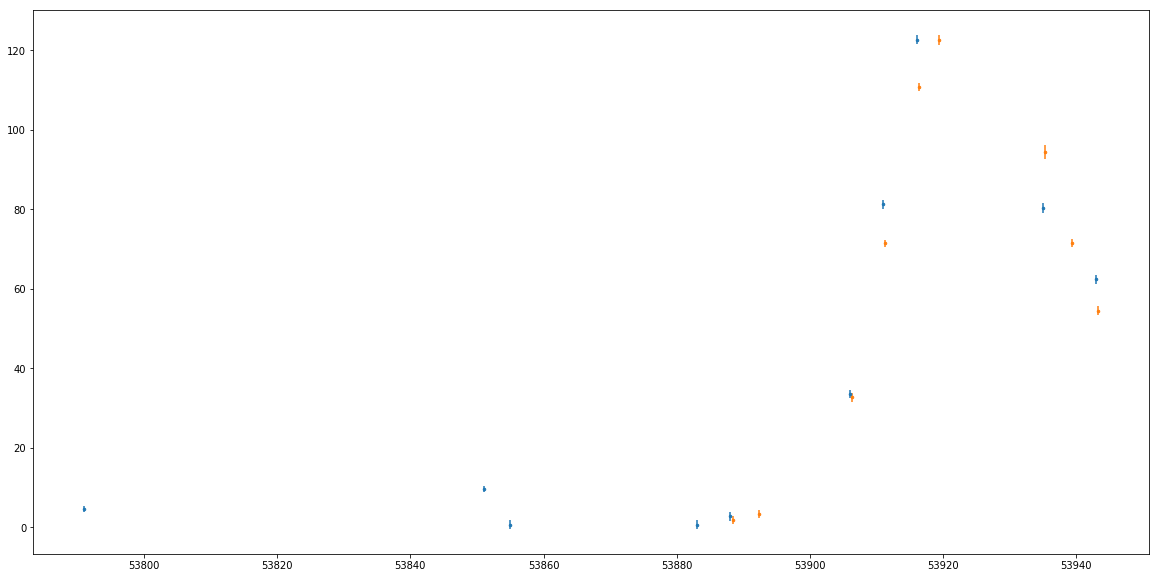

3
214.435958333 52.3611805556


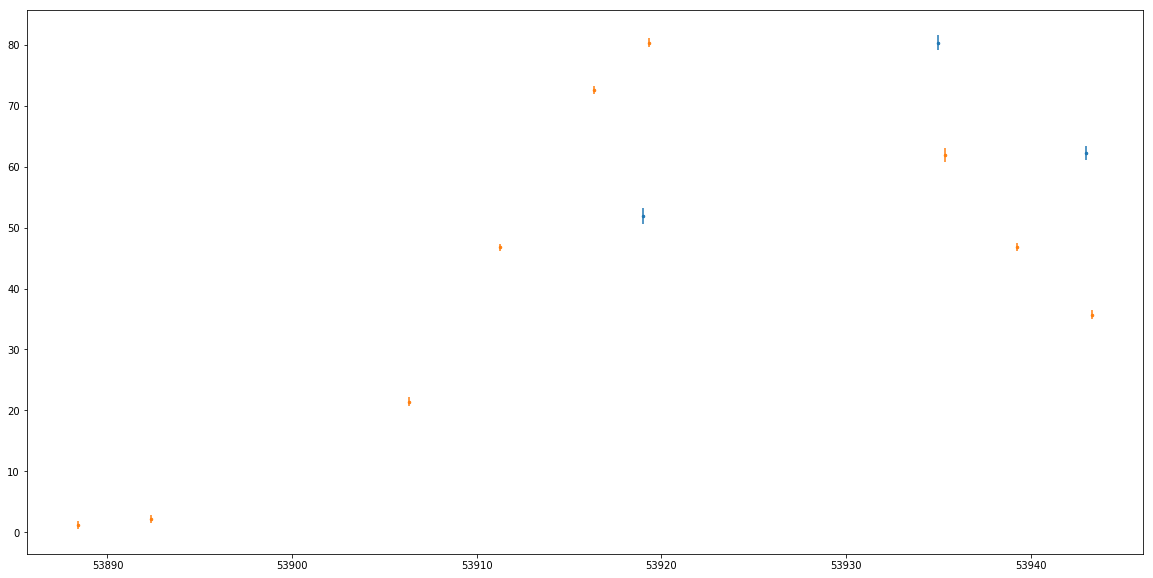

5
214.263475 52.9362527778


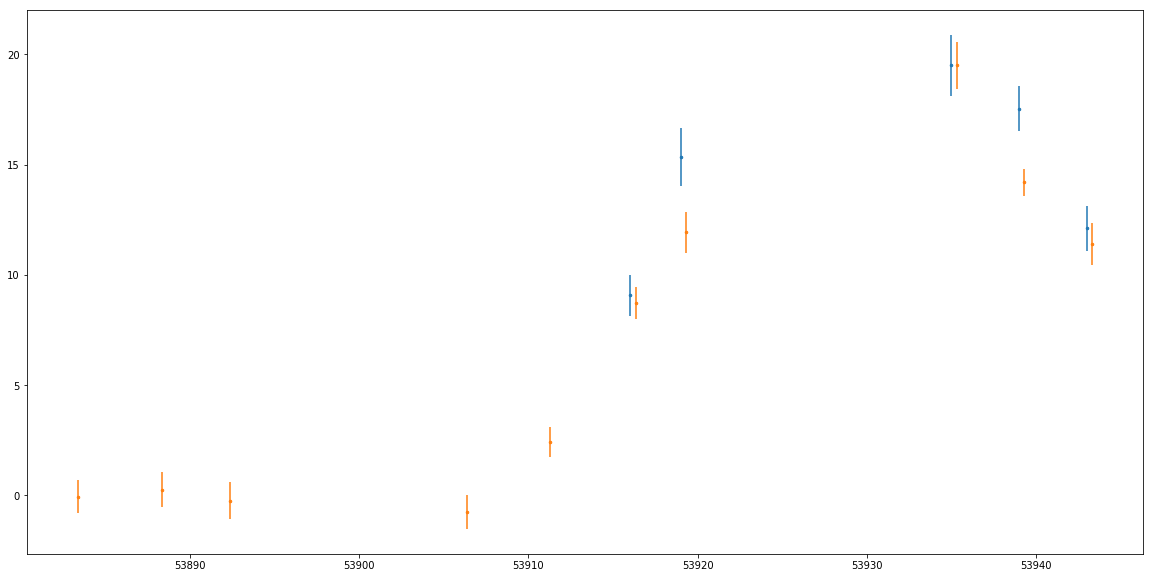

In [364]:
show_matches_2(matches_45)

5
214.291841667 53.024825


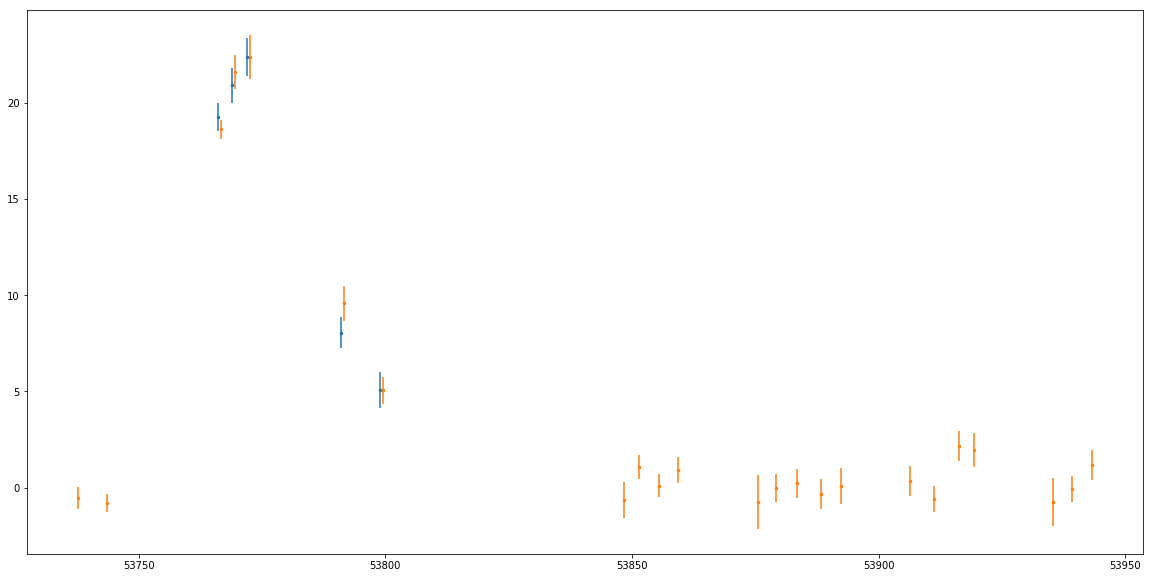

6
215.181558333 52.1910638889


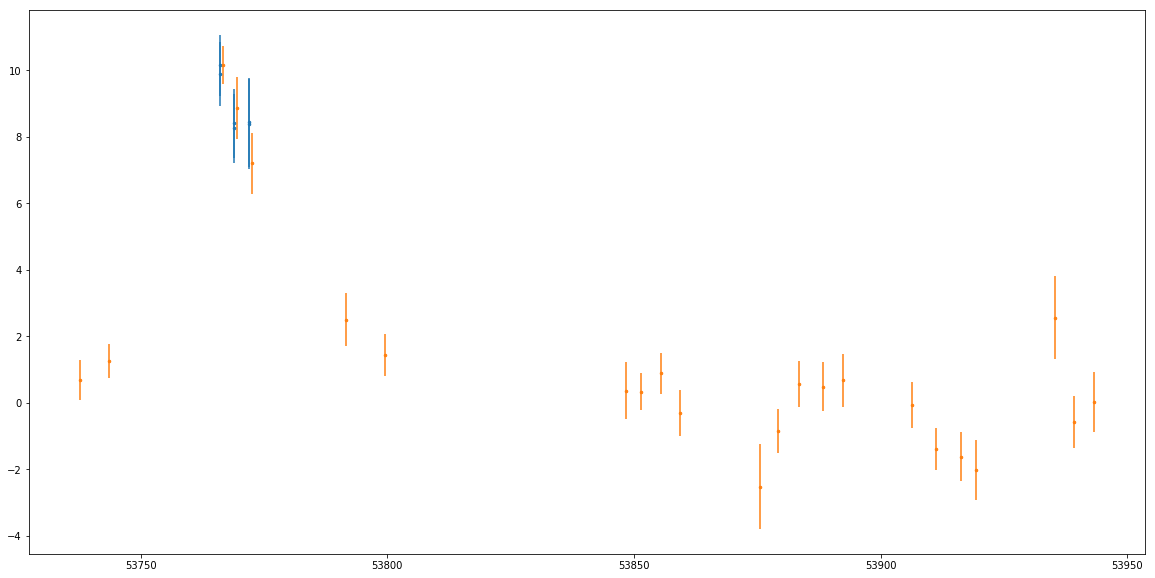

4
214.381666667 52.9124722222


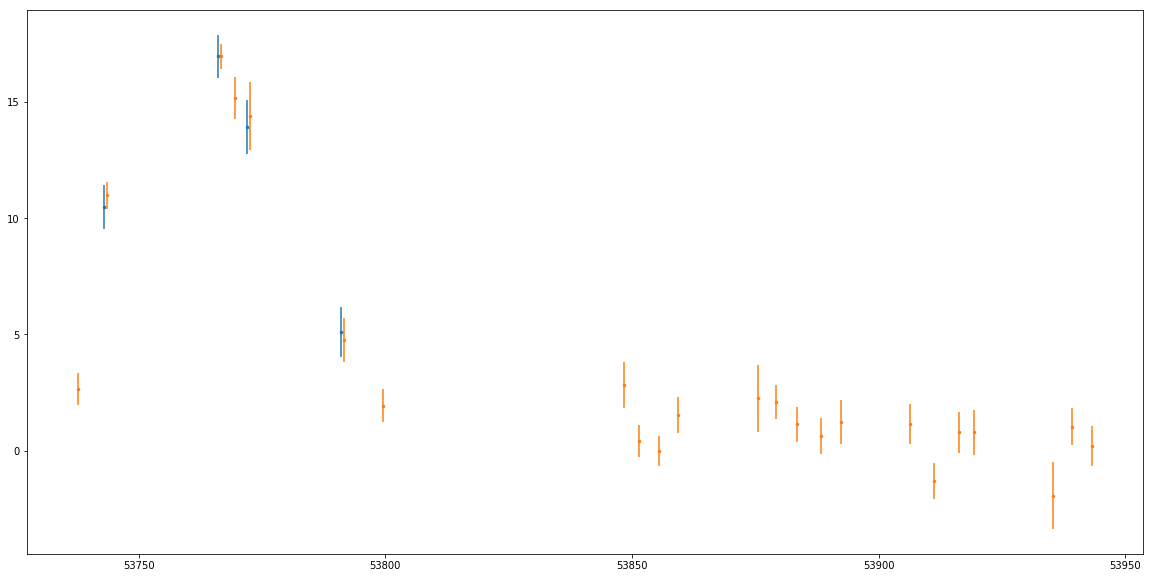

9
214.8577 52.6409833333


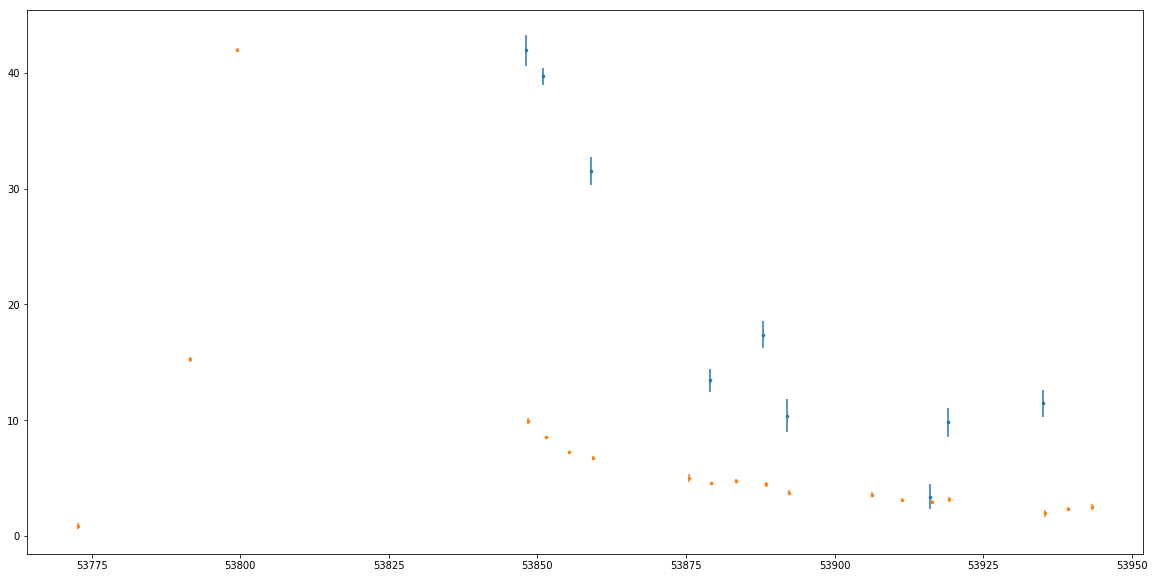

27
215.571704167 52.9576805556


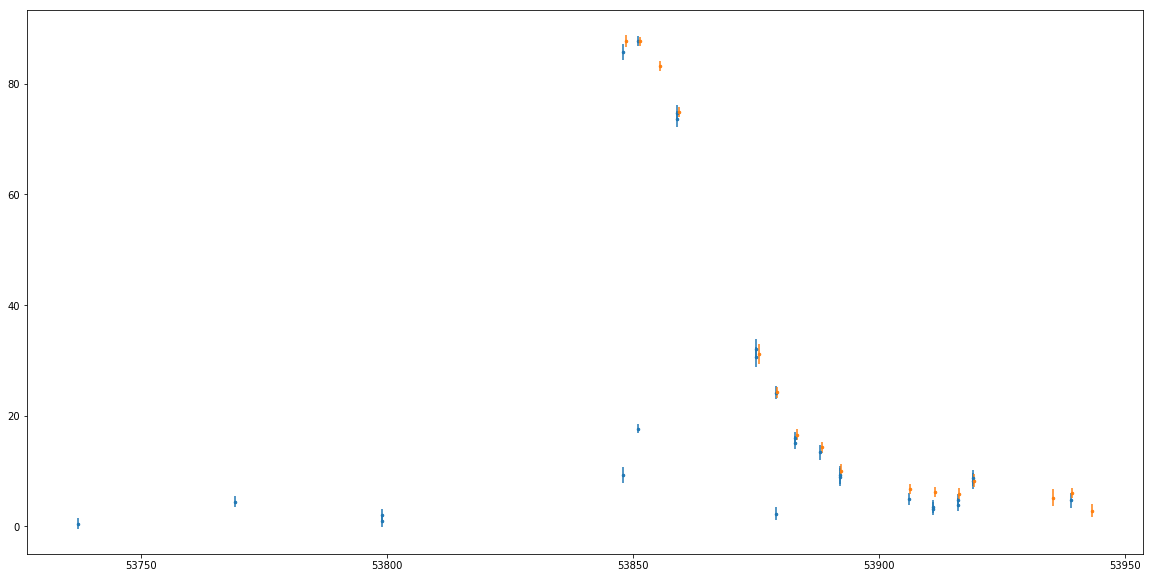

14
215.552404167 52.6408472222


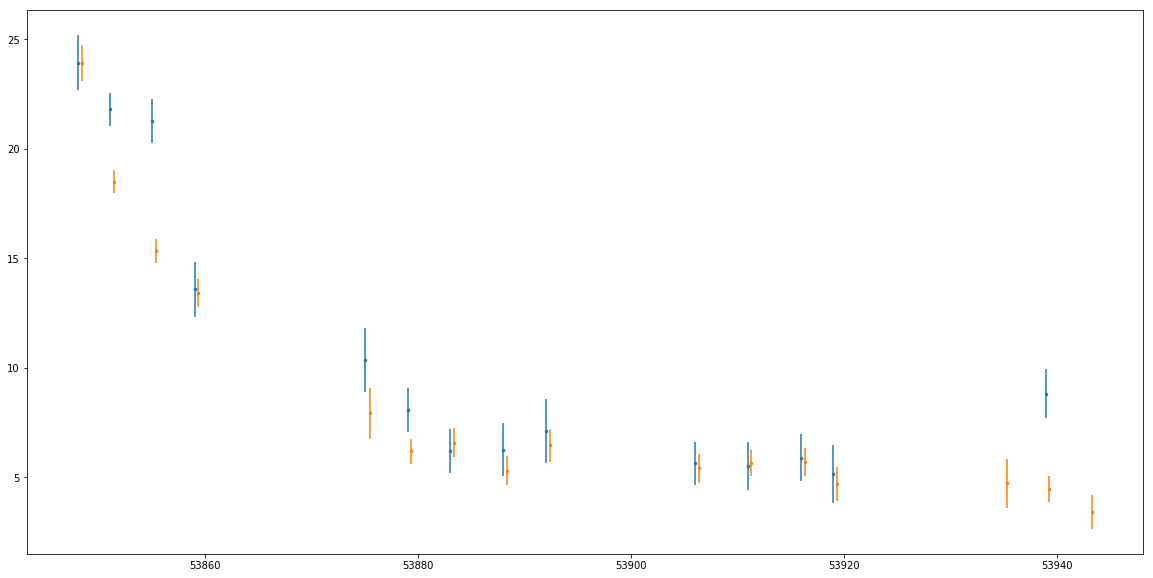

8
214.247466667 52.8825444444


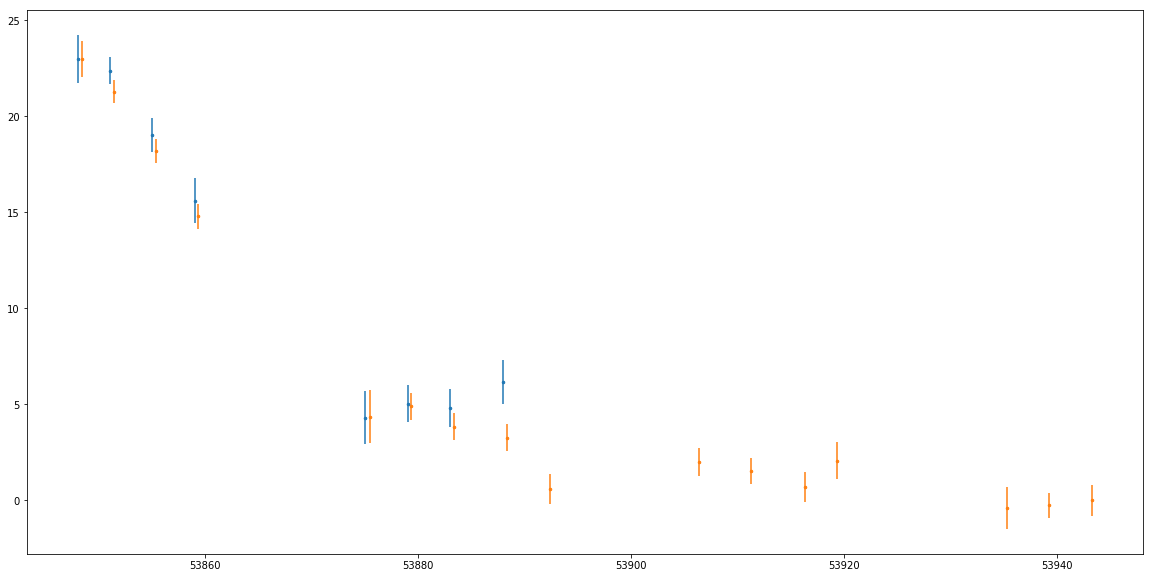

14
214.340266667 52.4528166667


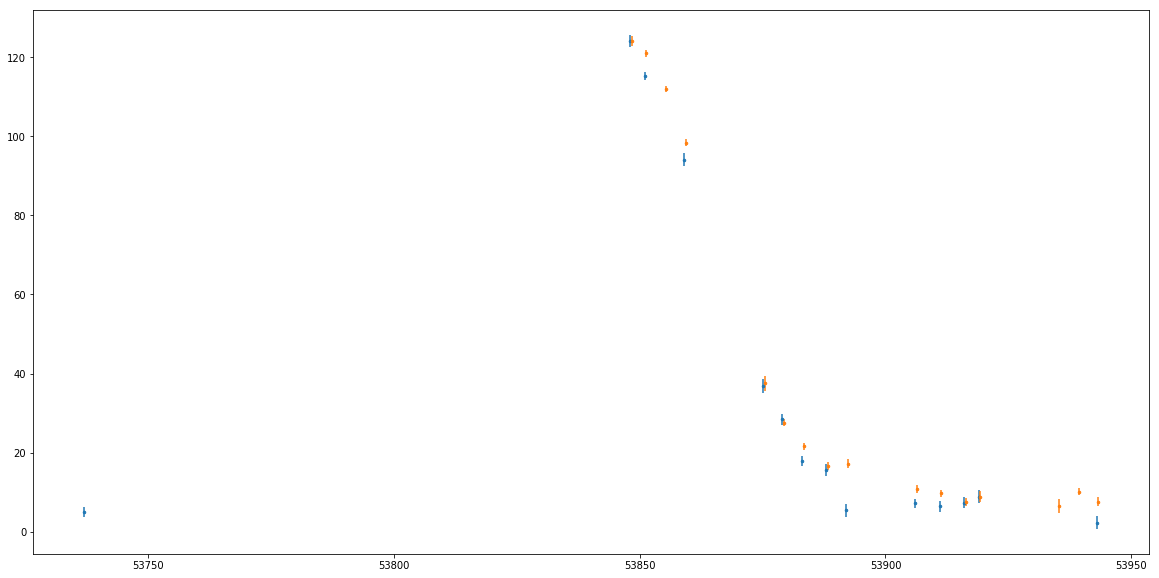

12
214.340266667 52.4528166667


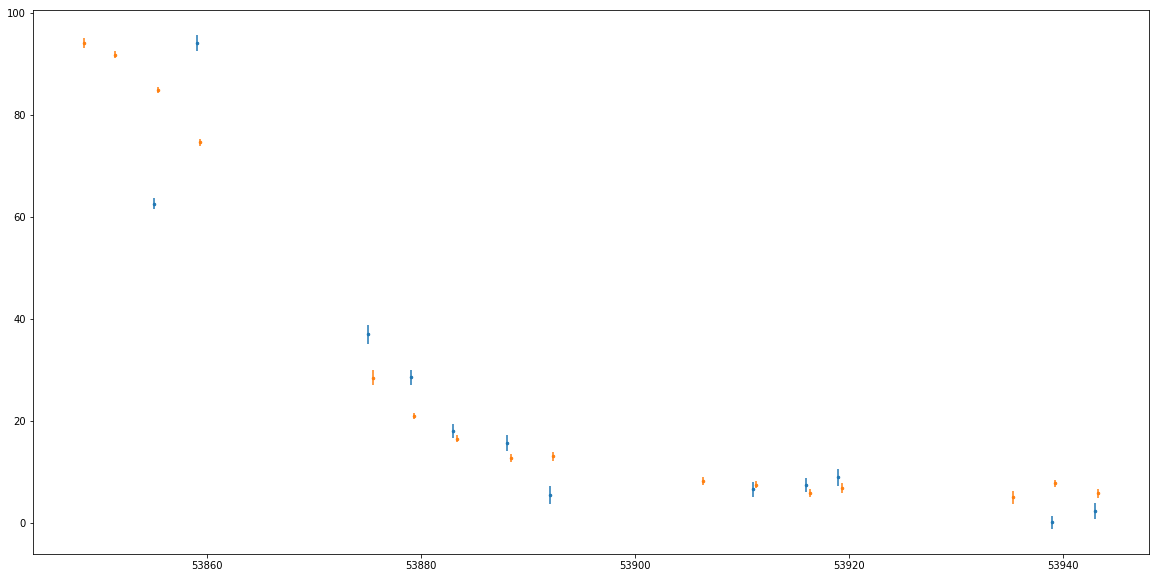

22
214.699175 52.7565583333


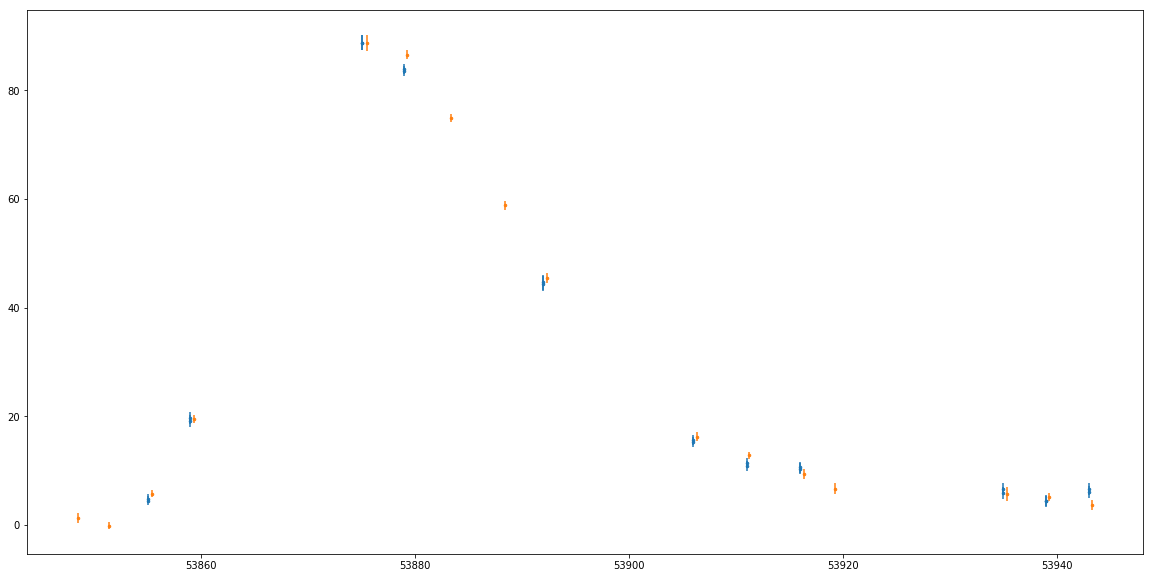

11
214.254529167 52.2324


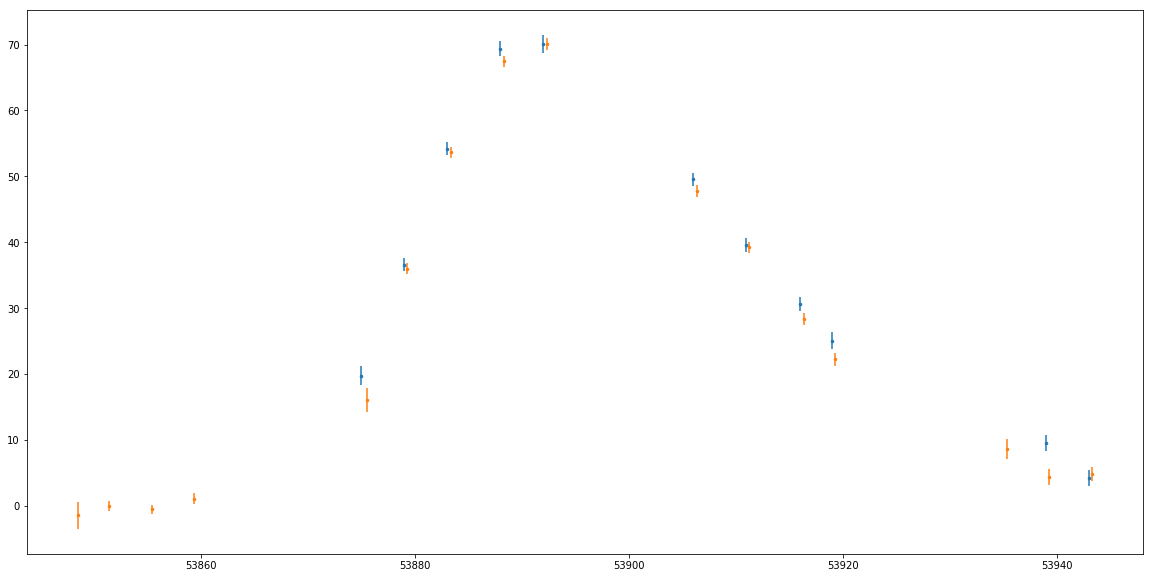

6
214.847579167 53.0230138889


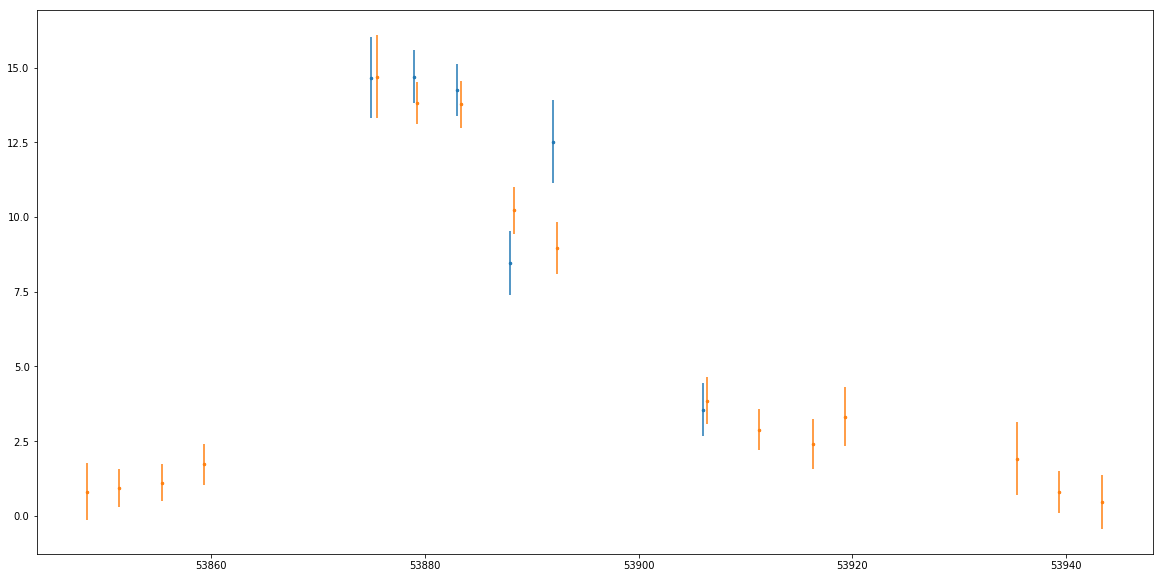

4
215.305566667 52.4560777778


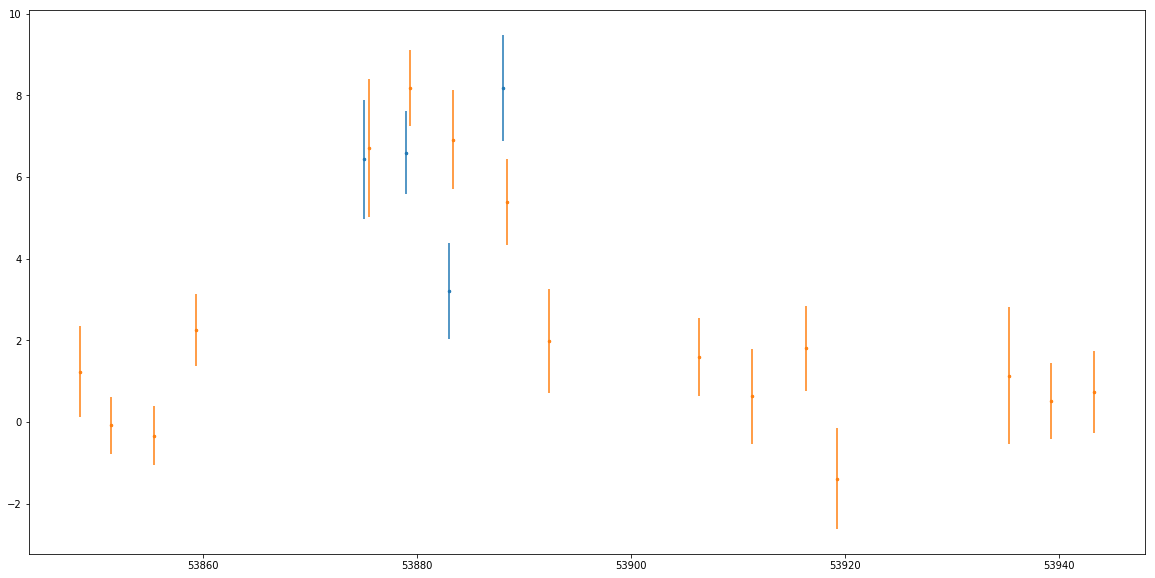

23
215.519875 52.3383666667


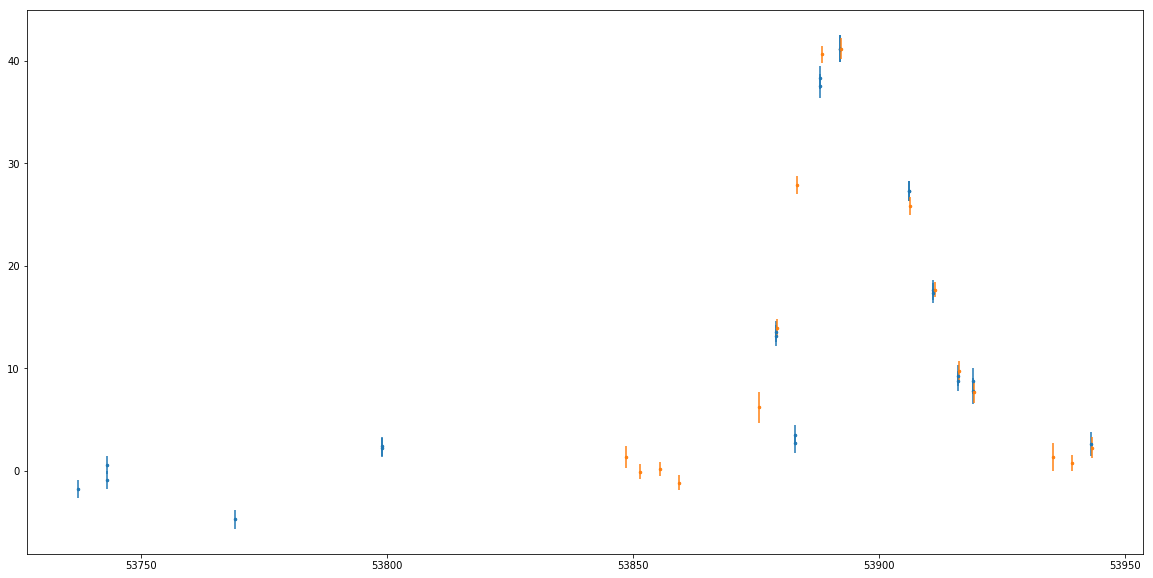

9
215.077520833 52.8971638889


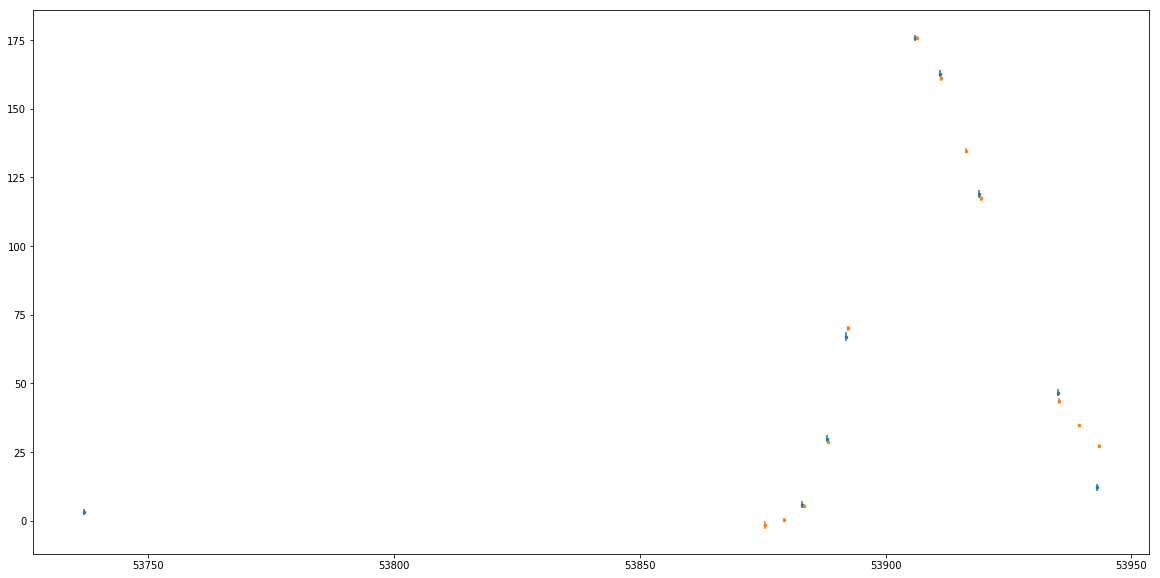

14
214.6309125 52.4429083333


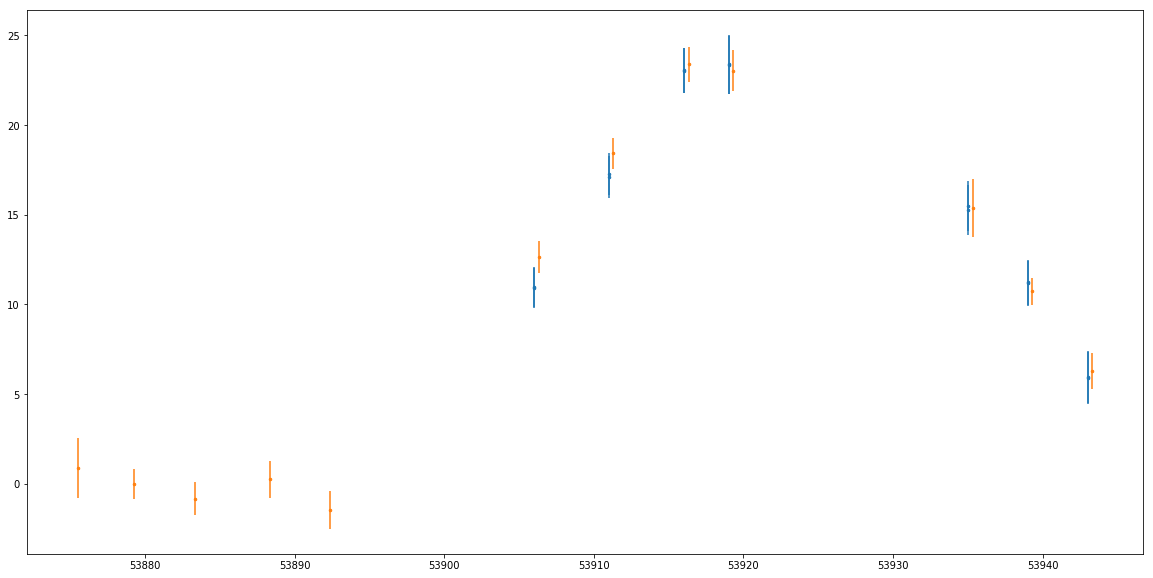

10
214.435958333 52.3611805556


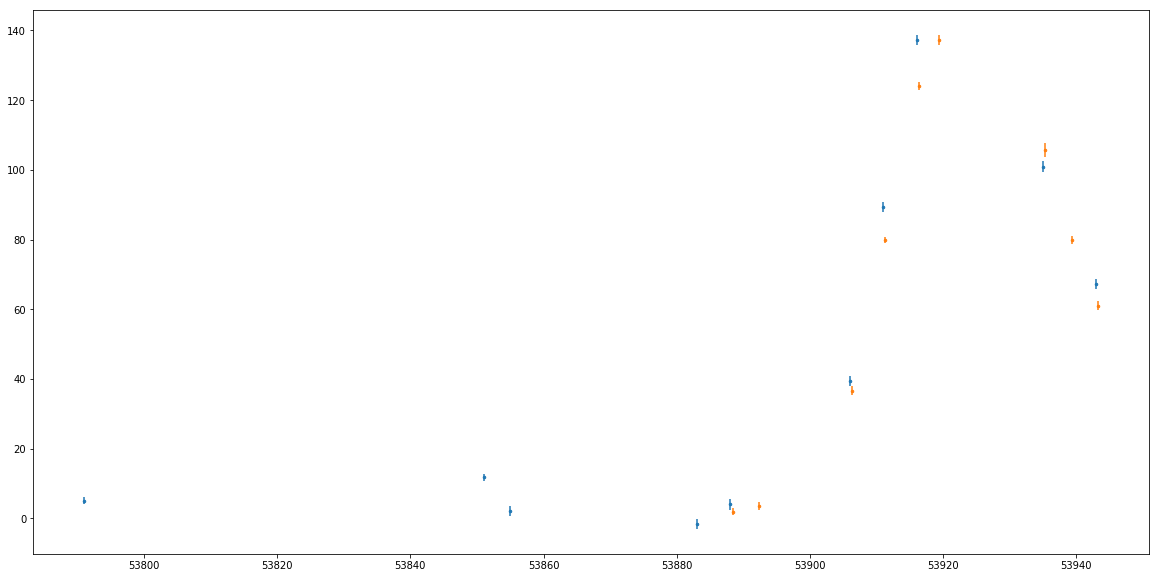

3
214.435958333 52.3611805556


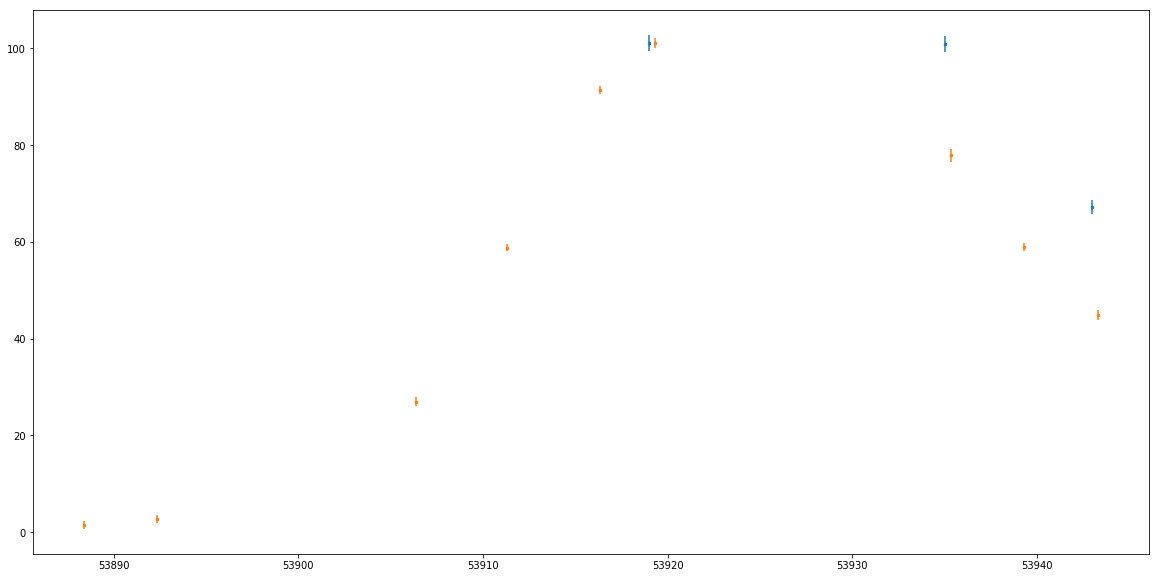

5
214.263475 52.9362527778


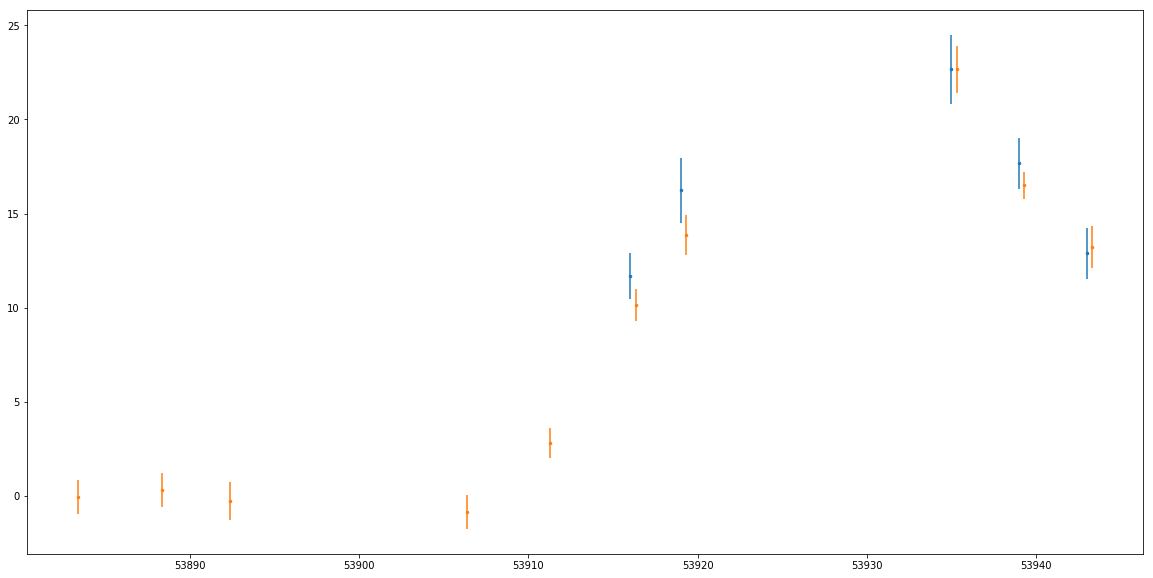

In [365]:
show_matches_2(matches_6)

5
214.291841667 53.024825


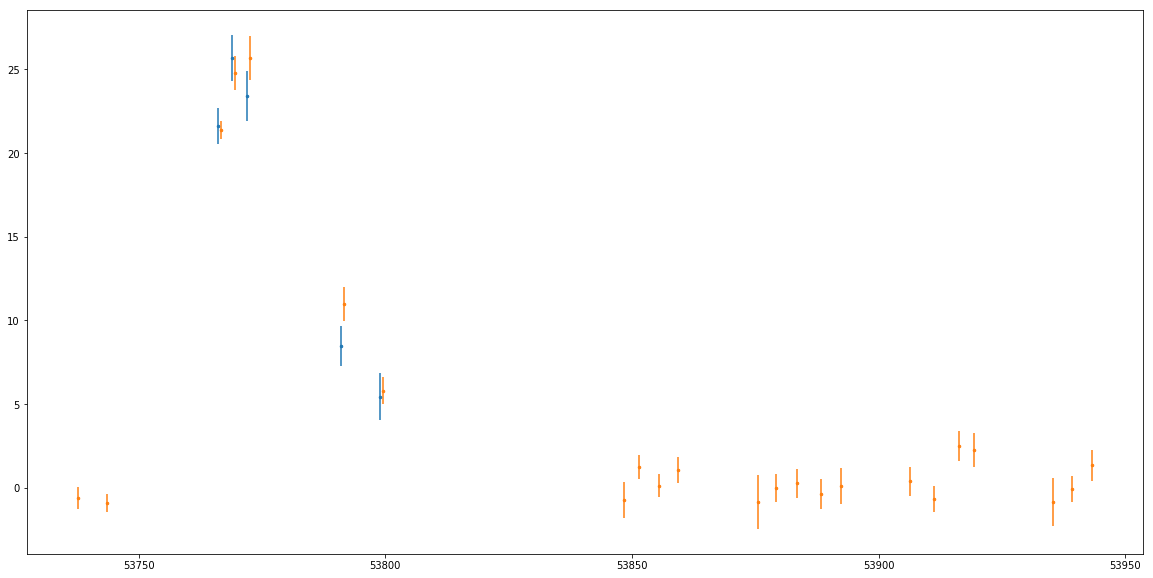

6
215.181558333 52.1910638889


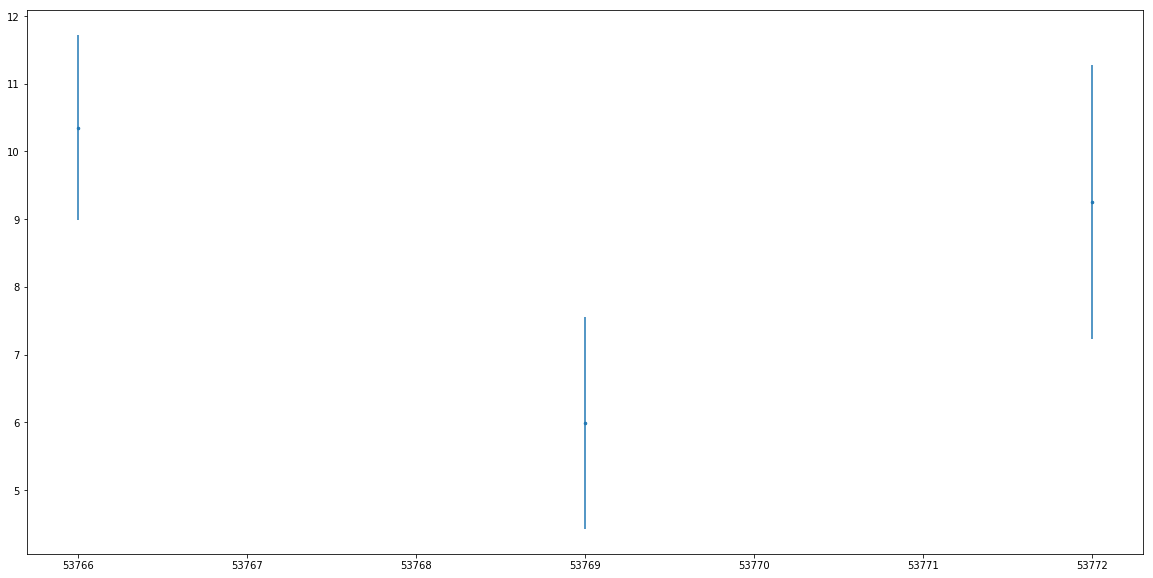

4
214.381666667 52.9124722222


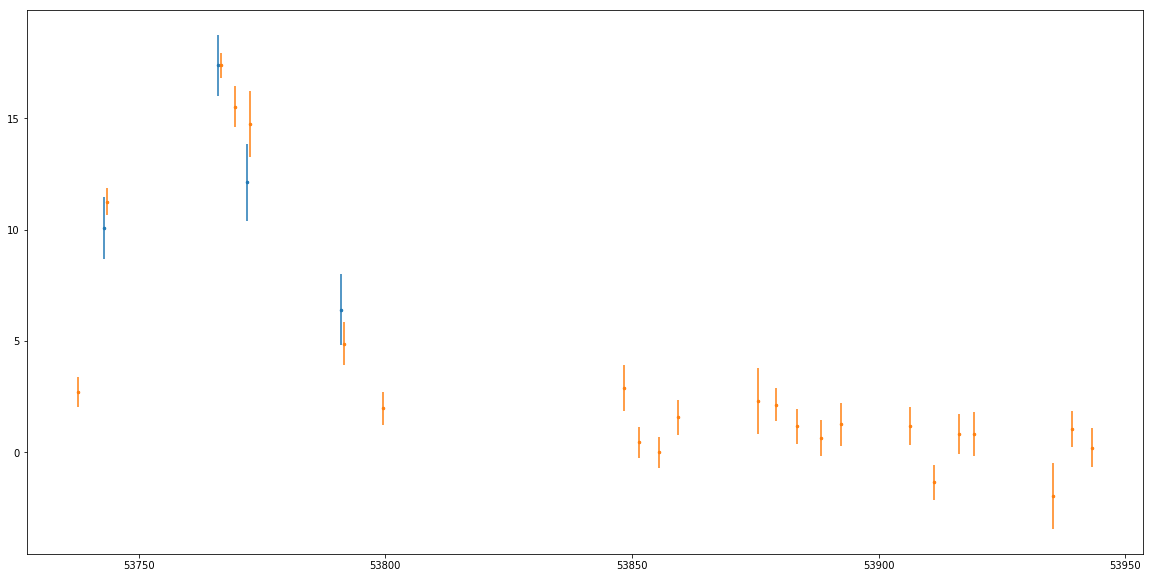

9
214.8577 52.6409833333


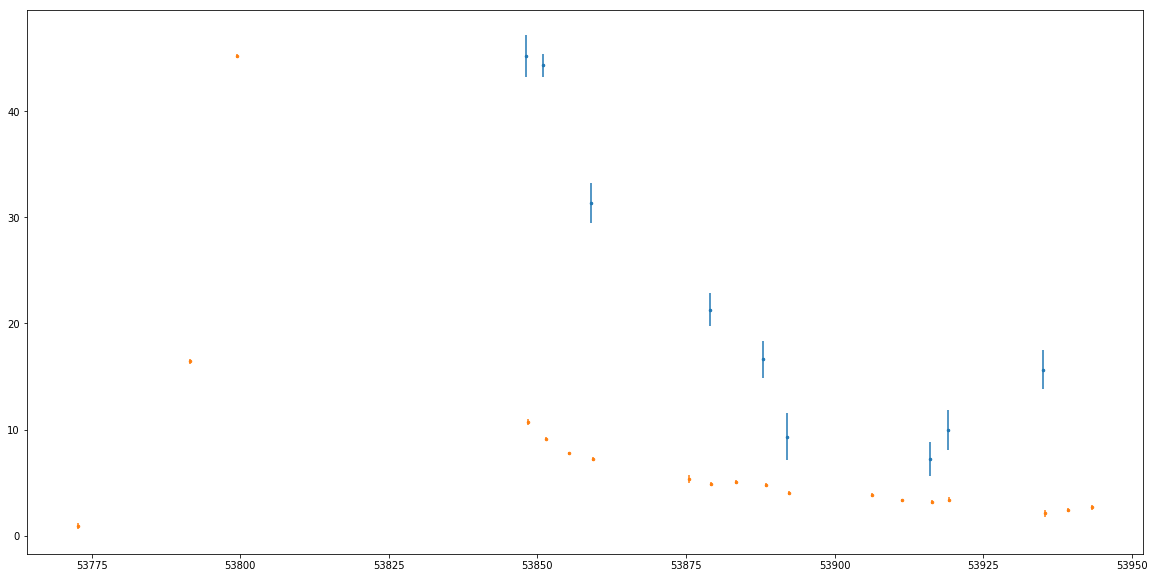

27
215.571704167 52.9576805556


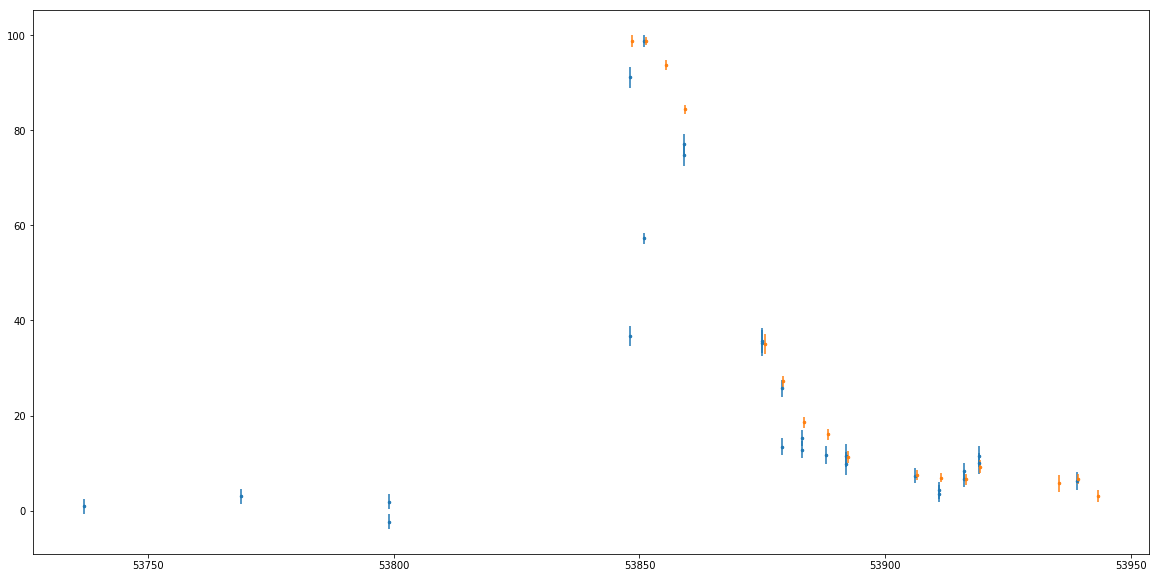

14
215.552404167 52.6408472222


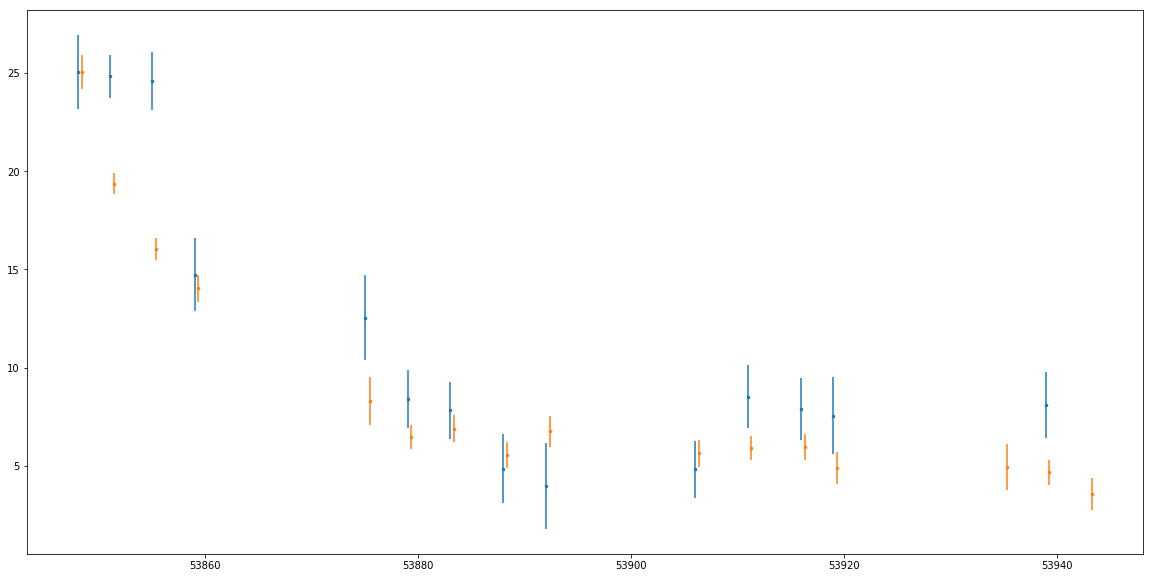

8
214.247466667 52.8825444444


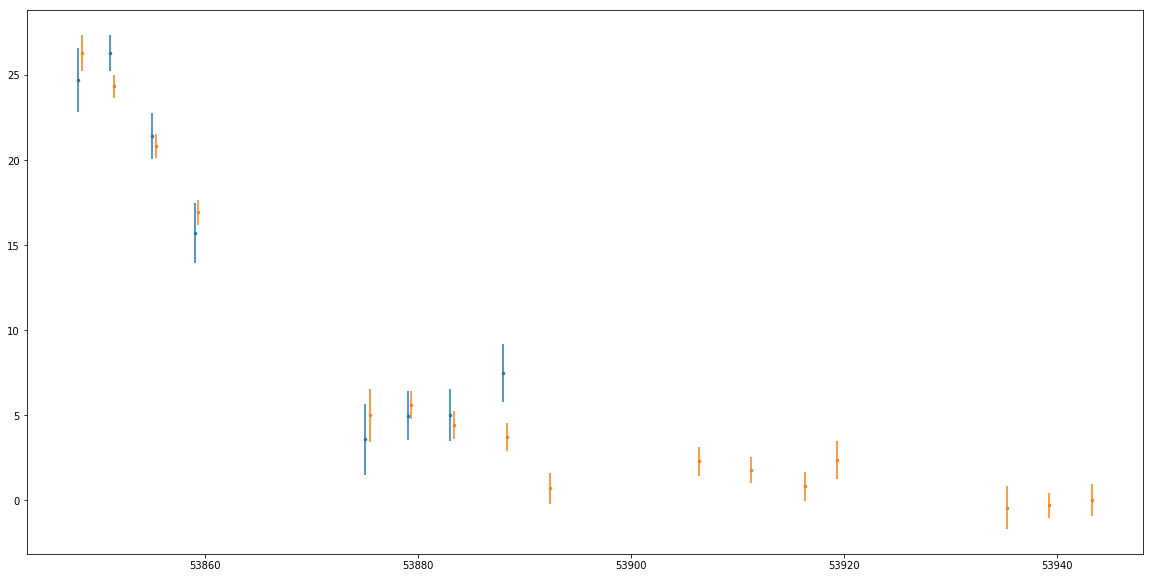

14
214.340266667 52.4528166667


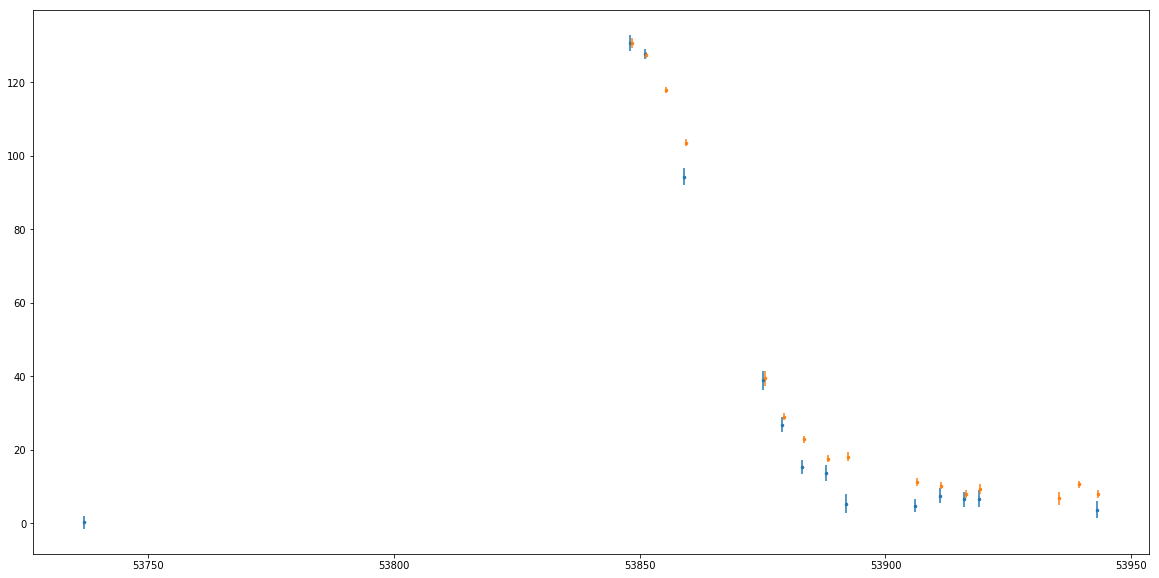

12
214.340266667 52.4528166667


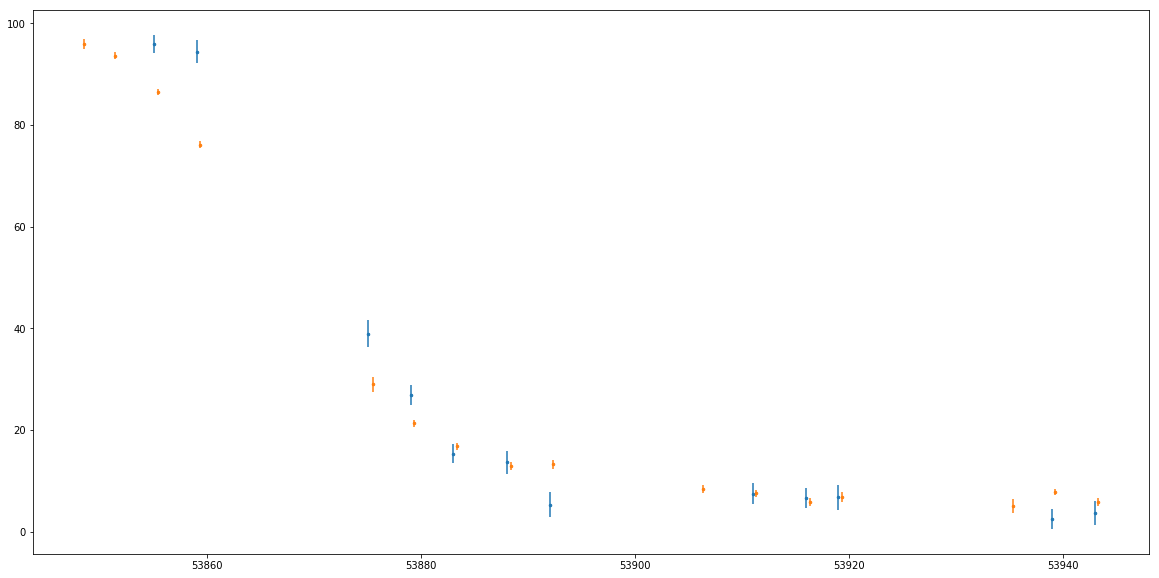

22
214.699175 52.7565583333


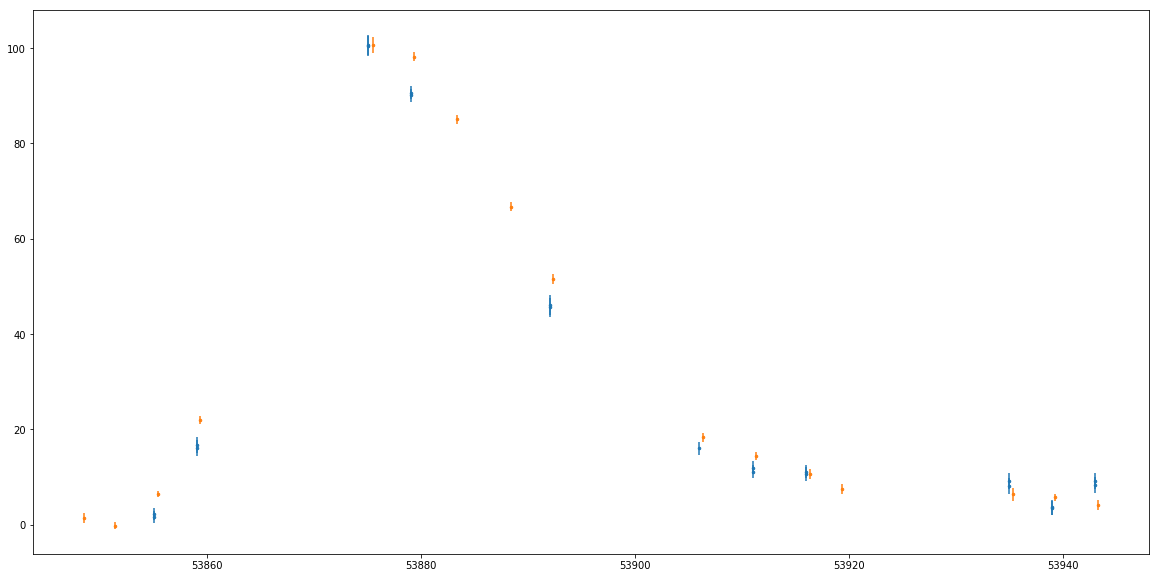

11
214.254529167 52.2324


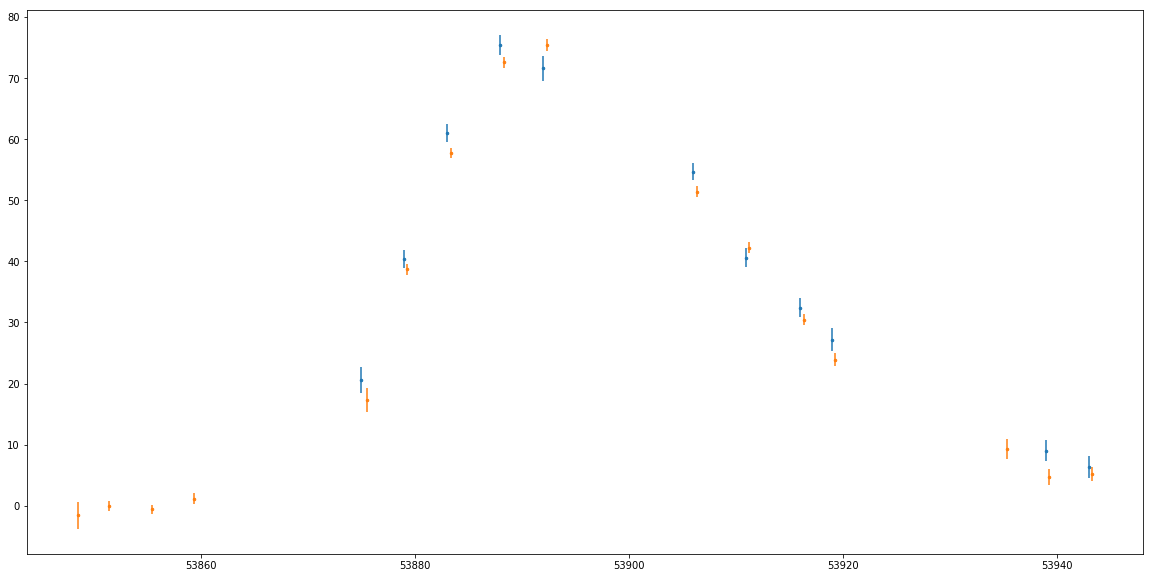

6
214.847579167 53.0230138889


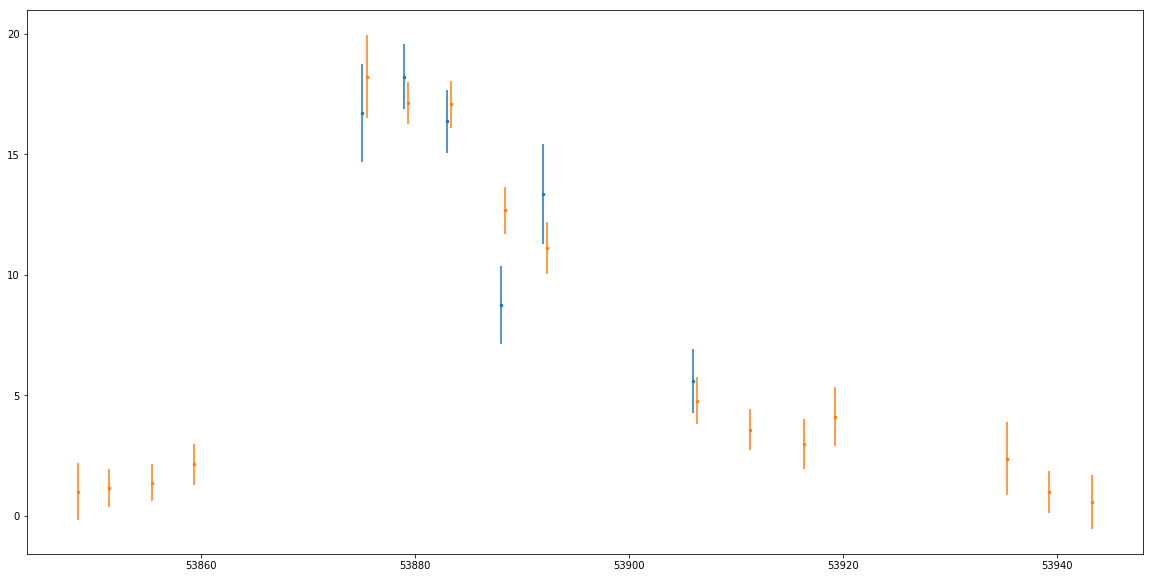

4
215.305566667 52.4560777778


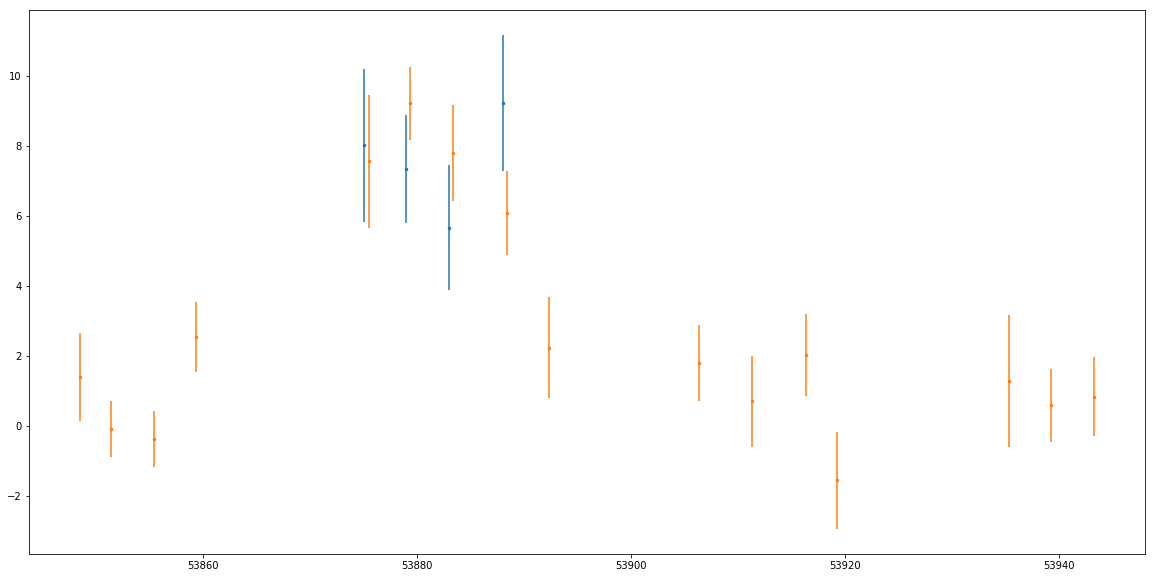

23
215.519875 52.3383666667


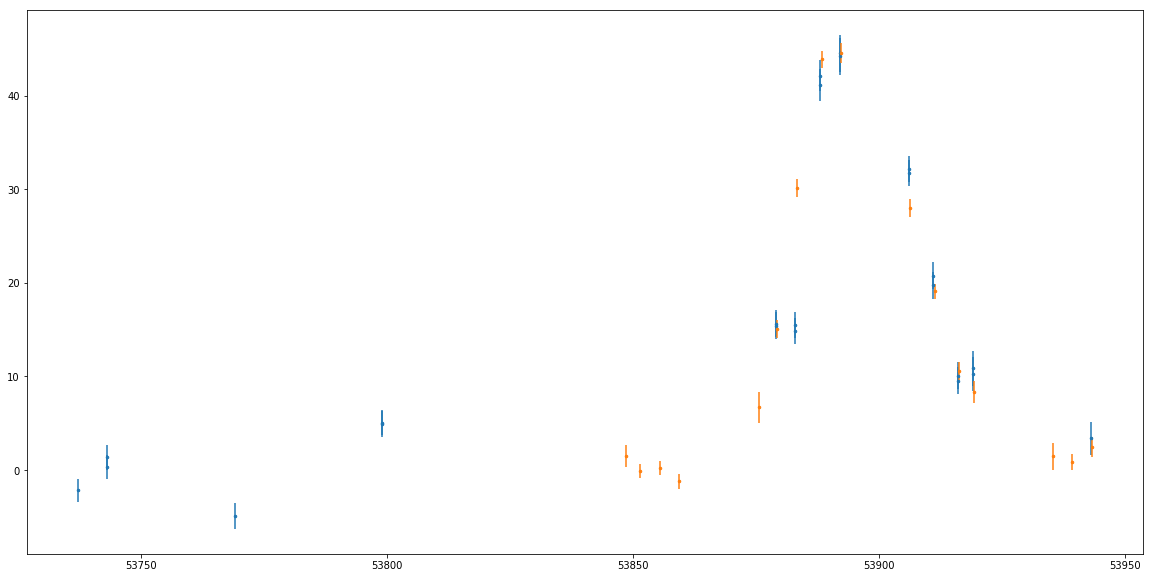

9
215.077520833 52.8971638889


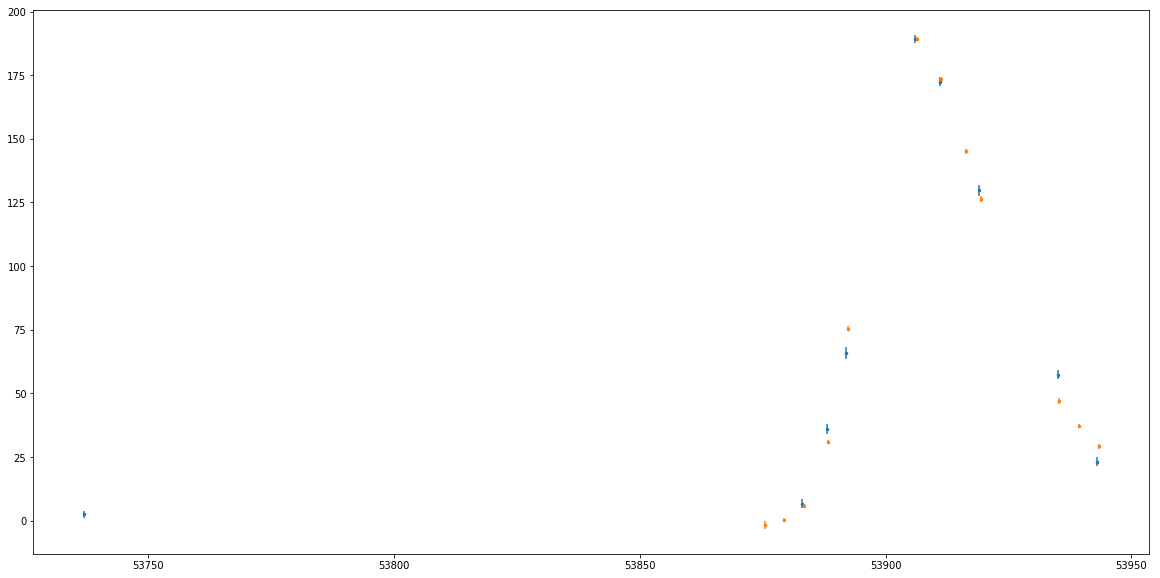

14
214.6309125 52.4429083333


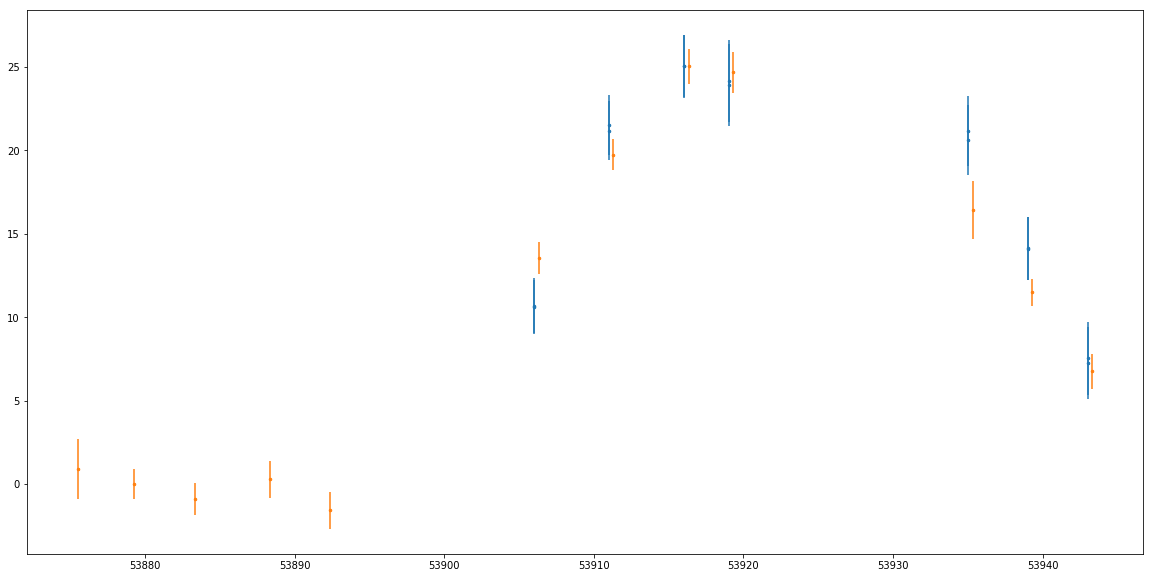

10
214.435958333 52.3611805556


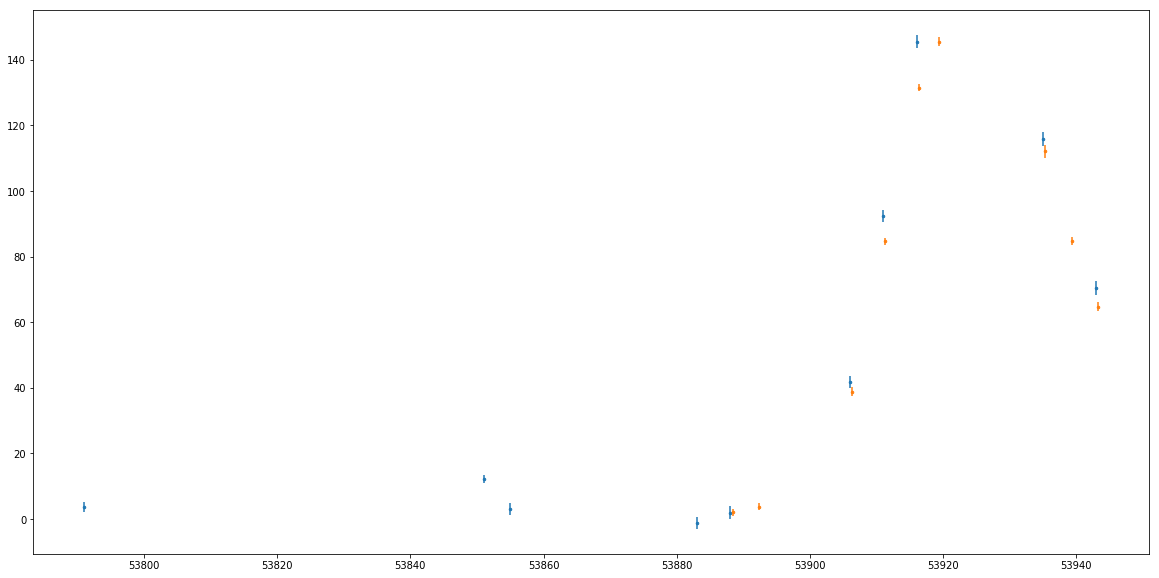

3
214.435958333 52.3611805556


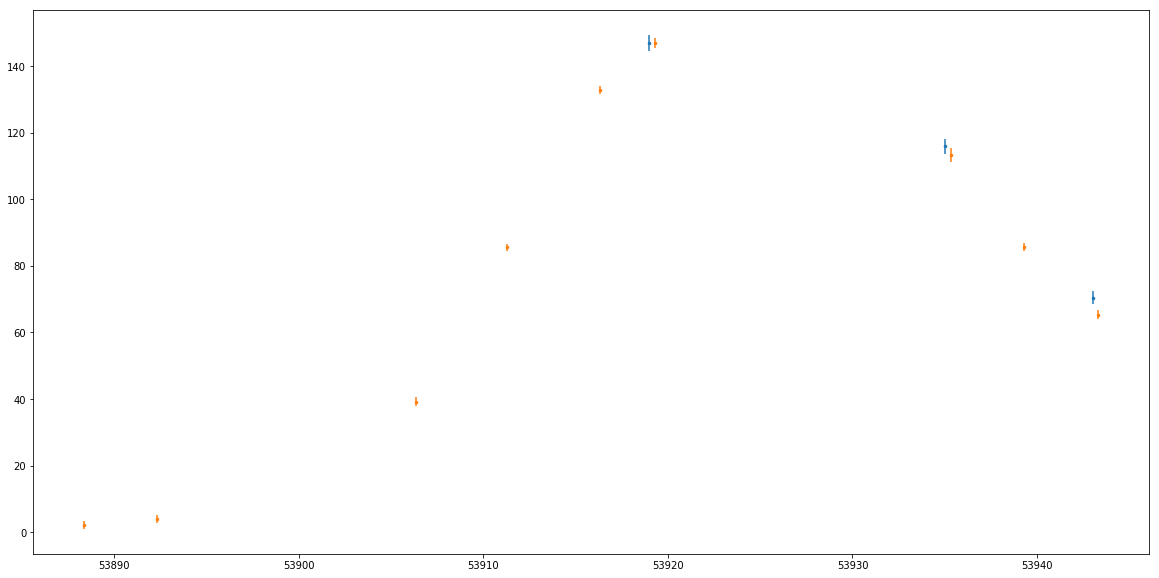

5
214.263475 52.9362527778


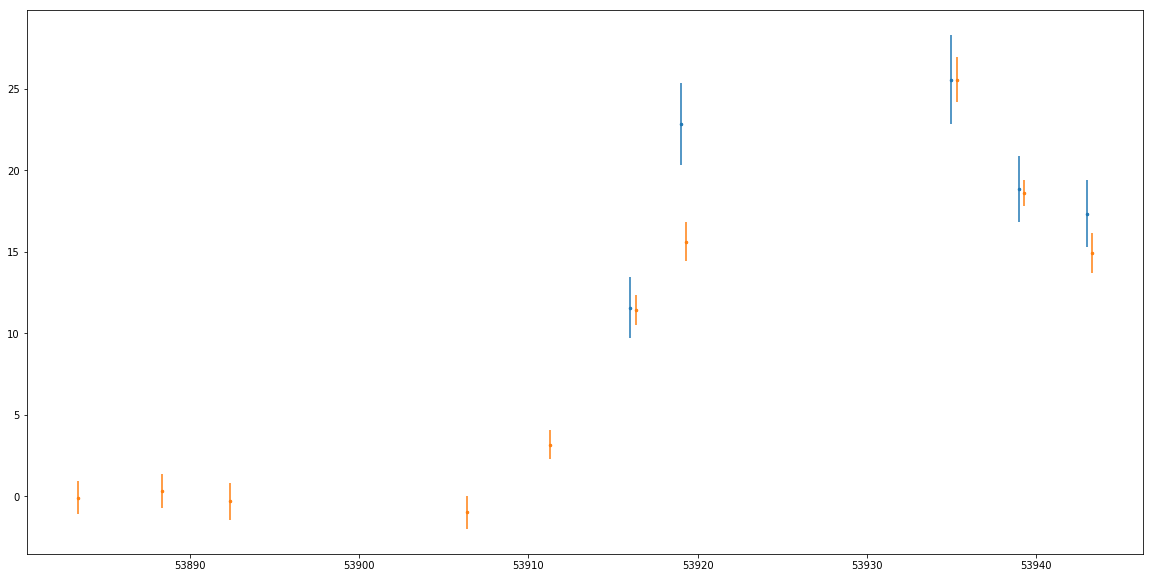

In [366]:
show_matches_2(matches_9)

In [ ]:
factors = []
for match in matches:
    print len(match[-1])
    print np.rad2deg(match[0][0]['ra']), np.rad2deg(match[0][0]['dec'])
    lc_fluxes = match[-1]["flux"]
    factor = max(match[0]['flux']) / max(lc_fluxes)
    lc_fluxes = np.multiply(lc_fluxes, factor)
    lc_errors = np.multiply(match[-1]["flux_error"], factor)
    factors.append(factor)
    plt.figure(figsize=(20,10))
    plt.errorbar(match[0]["mjd"], match[0]["flux"],yerr=match[0]["flux_error"], fmt='.', markersize='5')
    plt.errorbar(match[-1]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
    plt.show()

In [ ]:

print np.mean(f_copy), np.std(f_copy)

In [ ]:
for match in matches:
    print len(match[0])
    lc_fluxes = match[0]["flux"]
    factor = max(match[-1]['flux']) / max(lc_fluxes)
    lc_fluxes = np.multiply(lc_fluxes, factor)
    lc_errors = np.multiply(match[0]["flux_error"], factor)
    
    plt.figure(figsize=(20,10))
    plt.errorbar(match[-1]["mjd"], match[-1]["flux"],yerr=match[-1]["flux_error"], fmt='.', markersize='5')
    plt.errorbar(match[0]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
    plt.show()

In [ ]:
date = dates[0]
patch_and_coord = []
degrees = []
for lc in snls_array:
    for patch in patches:

        if butler.datasetExists("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
                dayDiff = butler.get("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
                bbox = dayDiff.getBBox()
                wcs = dayDiff.getWcs()
                
                angle_ra = afwGeom.Angle(lc[0]["ra"])
                angle_dec = afwGeom.Angle(lc[0]["dec"])
                coord = wcs.skyToPixel(angle_ra, angle_dec)
                
                if bbox.contains(afwGeom.Point2I(coord)):
                    patch_and_coord.append((patch, angle_ra.asDegrees(), angle_dec.asDegrees(), np.median(lc['mjd'])))
                    #break
                    
    degrees.append(coord)

In [ ]:
for lc in snls_array:
    print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])

In [ ]:
degrees

In [ ]:
patch_and_coord

In [61]:
pa = '22,11'
ra = 215.18155833333333
dec = 52.191063888888884
#exp = "dayCoadd"
exp = "dayDiff_differenceExp"

visualize(pa, '2006-04-22', ra , dec , exp, frame = 1)
#visualize(pa, '2006-01-08', ra, dec,exp, frame = 2)
#visualize(pa, '2006-01-31', ra, dec,exp, frame = 3)
#visualize(pa, '2006-02-03', ra, dec,exp, frame = 4)

(10860, 5356.5)


In [28]:
visualize(pa, '2006-02-06', ra , dec , exp, frame = 5)
#visualize(pa, '2006-02-08', ra , dec , exp, frame = 6)
visualize(pa, '2006-02-25', ra , dec , exp, frame = 7)
#visualize(pa, '2006-02-20', ra , dec , exp, frame = 8)

FitsError: 
  File "src/fits.cc", line 1067, in lsst::afw::fits::Fits::Fits(const string&, const string&, int)
    cfitsio error: could not open the named file (104) : Opening file '/datadec/cppm/jpreyes/CFHT_Small/detect_testSN/dayDiff/2006-02-06/i/0/22,11/diffexp-2006-02-06-i-0-22,11.fits' with mode 'r' {0}
lsst::afw::fits::FitsError: 'cfitsio error: could not open the named file (104) : Opening file '/datadec/cppm/jpreyes/CFHT_Small/detect_testSN/dayDiff/2006-02-06/i/0/22,11/diffexp-2006-02-06-i-0-22,11.fits' with mode 'r''


In [2]:
def visualize(patch, date, ra, dec, exp, frame=1):
    
    dataId= {"filter":filter,"tract":0, "patch":patch, 'date':date}
    dayDiff = butler.get(exp, dataId=dataId)
    catalog = butler.get("dayDiff_class_diaSrc", dataId=dataId)
    ds9.mtv(dayDiff, frame=frame)
    ds9.setMaskTransparency(100, frame=frame)
    for source in catalog:

        ds9.dot("o", source.getX(), source.getY(), size = 25, ctype = ds9.RED, frame=frame)

    bbox = dayDiff.getBBox()
    wcs = dayDiff.getWcs()

    angle_ra = afwGeom.Angle(ra, afwGeom.degrees)
    angle_dec = afwGeom.Angle( dec , afwGeom.degrees)
    coord = wcs.skyToPixel(angle_ra, angle_dec)
    print coord
    ds9.dot("o", coord.getX(), coord.getY(), size = 20, ctype = ds9.BLUE, frame=frame)

In [ ]:
stack_lc[0]

In [ ]:
from astropy.table import Column

In [ ]:
for i, lc in enumerate(stack_lc):
    l = lc.copy()
    ms = []
    m_es = []
    for row in lc:
        row['ra'] = float(row['ra'])
        row['dec'] = float(row['dec'])
        row['zp'] = 30.0
        
        if np.isnan(row['flux']) == False and row['flux'] > 0: 
            f =  FluxToMagnitud(row['flux'], row['zp'])
            e = FluxErrorToMagnitud(row['flux'],row['flux_error'])
            ms.append(f)
            m_es.append(e)
        else:
            ms.append(np.nan)
            m_es.append(np.nan)
    c_ms = Column(ms, name='magnitude')
    c_m_es = Column(m_es, name='magnitude_error')
    l.add_column(c_ms)
    l.add_column(c_m_es)
        
    ascii.write(l, '/renoir_data_02/jpreyes/lsst_data/light_curves/second_set/'+str(i)+'.dat')
    
    

In [ ]:

from astropy.io import ascii

ascii.write(l, '/renoir_data_02/jpreyes/lsst_data/light_curves_2/1.dat')

In [ ]:
def FluxToMagnitud( flux,  zp):
    return zp-(2.5*np.log10(flux))

def FluxErrorToMagnitud(flux, error):
    return (2.5/np.log(10))*(error/flux)